 <b>1. Identify the type of models which you will prefer to make for this project.</b>

---



*   Since there is No Linearity between the target variable and Independent Variable , we are using the algorithms which are work on non linear supervised Algorithms like Random Forest, KNN, Xg Boost and Ada boost.  

**target variable = installs**

Importing the Libraries

In [69]:
#basic Libraries to work with the data
import numpy as np
import pandas as pd


#data visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#train test split library
from sklearn.model_selection import train_test_split

#Hyper parameter Tuning library
from sklearn.model_selection import GridSearchCV

#Importing ML Models Libraries
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

#Different Metrics to check the accuracy of the model
import statsmodels.api as sm #OLS 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

<b>Importing data</b>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


checking the top 5 rows of the Data Set

In [71]:
ps_data = pd.read_csv('/content/drive/MyDrive/ML_Data/internship case study/googleplaystore.csv')
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [72]:
ps_data.shape

(10841, 13)

we have only one integer variable rating


1.   we can see that there is null values present in the data
2.   some outlers are there by seeing mean and max value



In [73]:
ps_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Displaying list of columns

In [74]:
ps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Information About the data set, such as column name, non_null count and data type of each feature

In [75]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Checking the all uniqye values and there counts from the Data


*   App - 9660 unique values are there
*   Category - There are 34 unique c=values are there
*   rating - there are 40 unique values are there
*   Reviews - there are 6002 unique reviews are there
*   Size - there are 462 unique size are there
*   Installs - there are 22 unique installs are there
*   Type - there are 3 unique values are there, in that only free and paid are valic, for '0' we have to convert it to 'Free'
 and nan values we have to filling by mean 

* Price - there are 93 unique prices are there
* Content Rating - There are 6 unique values are there, in that we have to remove the nan values
*  Genres - There are 120 Unique Genres are there 



In [76]:
for col in ps_data.columns:
  print(col)
  print(ps_data[col].unique())
  print(ps_data[col].nunique())
  print()

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
9660

Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
34

Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
40

Reviews
['159' '967' '87510' ... '603' '1195' '3

Reviews data Cleaning

In [77]:
ps_data = ps_data[ps_data['Reviews'] != '3.0M']

In [78]:
ps_data['Reviews'] = ps_data['Reviews'].astype('int')

<ipython-input-78-44647300426c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_data['Reviews'] = ps_data['Reviews'].astype('int')


In [79]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


Installs data Cleaning


1.   Removing comma and + from the installs
2.   converting object to integer value



In [80]:
ps_data['Installs'] = ps_data['Installs'].str.replace('+','')

<ipython-input-80-2d3e2ccafa85>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps_data['Installs'] = ps_data['Installs'].str.replace('+','')


In [81]:
ps_data['Installs'] = ps_data['Installs'].str.replace(',','')

In [82]:
ps_data['Installs'] = ps_data['Installs'].astype('int')

In [83]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [84]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


Price data Cleaning


1.   Removing the dollar sign from the price column and converting that into float datatype



In [85]:
ps_data['Price'] = ps_data['Price'].str.replace('$','')

<ipython-input-85-4adcd3eb7496>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps_data['Price'] = ps_data['Price'].str.replace('$','')


In [86]:
ps_data['Price'] = ps_data['Price'].astype('float')

In [87]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


Last_Updated data Cleaning
1. Getting date , Month and Year as a saparate columns 
2. removing the date 

In [88]:
ps_data[['Updated_Day', 'Updated_Month', 'Updated_Year']] = ps_data['Last Updated'].str.split('/|-', expand=True)

In [89]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Updated_Day     10840 non-null  object 
 14  Updated_Month   10840 non-null  object 
 15  Updated_Year    10840 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 1.4+ MB


In [90]:
ps_data.drop(['Updated_Day','Last Updated','App','Current Ver'], axis = 1,inplace = True)

In [91]:
ps_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Updated_Month,Updated_Year
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up,Jan,18
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,Jan,18
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up,Aug,18
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,4.2 and up,Jun,18
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,Jun,18


In [92]:
ps_data['Updated_Year']

0        18
1        18
2        18
3        18
4        18
         ..
10836    17
10837    18
10838    17
10839    15
10840    18
Name: Updated_Year, Length: 10840, dtype: object

In [93]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          9366 non-null   float64
 2   Reviews         10840 non-null  int64  
 3   Size            10840 non-null  object 
 4   Installs        10840 non-null  int64  
 5   Type            10839 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Android Ver     10838 non-null  object 
 10  Updated_Month   10840 non-null  object 
 11  Updated_Year    10840 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB


Data Cleaning For Size 

1.   Removing the 'Varies With Mobile'bold text and converting the size column to 
2.   Some of the values in kb and some of them in mb, hich are the values is in Mb, converted to kb by multiplying 1024 (1mb = 1024kb)
3. converting object to the interger variable

In [94]:
ps_data = ps_data[ps_data["Size"].str.contains("Varies with device") == False]

In [95]:
ps_data['Size'] = ps_data['Size'].str.replace('k','')

<ipython-input-95-3f6c01bf7f37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_data['Size'] = ps_data['Size'].str.replace('k','')


In [96]:
# ps_data['Size'] = ps_data['Size'].str.contains('M').replace('M', apply(lambda x: x * 1024))
ps_data['Size'] = ps_data['Size'].str.replace('M', '').astype(float)
ps_data['Size'] = ps_data['Size'].apply(lambda x: x * 1024 if x < 1000 else x)

In [97]:
ps_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Updated_Month,Updated_Year
0,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up,Jan,18
1,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,Jan,18
2,ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up,Aug,18
3,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up,Jun,18
4,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,Jun,18


**2)  Check whether there are null values or not in the dataset. If null values are there then do the null value imputation.**


In [98]:
ps_data.isnull().sum()

Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Android Ver          2
Updated_Month        0
Updated_Year         0
dtype: int64

In [99]:
ps_data = ps_data[ps_data["Rating"] != 'NaN']

In [100]:
ps_data['Rating'] = ps_data['Rating'].fillna(ps_data['Rating'].mean())

In [103]:
ps_data['Type'] = ps_data['Type'].fillna('Free')

In [104]:
ps_data.dropna(subset = ['Android Ver'],inplace=True)

In [105]:
ps_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Android Ver       0
Updated_Month     0
Updated_Year      0
dtype: int64

In [106]:
ps_data.shape

(9143, 12)

In [107]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9143 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9143 non-null   object 
 1   Rating          9143 non-null   float64
 2   Reviews         9143 non-null   int64  
 3   Size            9143 non-null   float64
 4   Installs        9143 non-null   int64  
 5   Type            9143 non-null   object 
 6   Price           9143 non-null   float64
 7   Content Rating  9143 non-null   object 
 8   Genres          9143 non-null   object 
 9   Android Ver     9143 non-null   object 
 10  Updated_Month   9143 non-null   object 
 11  Updated_Year    9143 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 928.6+ KB


In [108]:
ps_data.describe().round(2)


,Rating,Reviews,Size,Installs,Price
count,9143.00,9143.00,9143.00,9.143000e+03,9143.00
mean,4.17,249103.14,37816.99,7.116398e+06,1.18
std,0.50,1716394.41,100708.69,4.619850e+07,17.36
min,1.00,0.00,1020.00,0.000000e+00,0.00
25%,4.10,22.00,5734.40,1.000000e+03,0.00
50%,4.20,742.00,15360.00,1.000000e+05,0.00
75%,4.50,25065.50,34816.00,1.000000e+06,0.00
max,5.00,44893888.00,1017856.00,1.000000e+09,400.00


 <b>Insights</b>

In [109]:
cat_features = ps_data.select_dtypes(include = 'object')
cat_features

,Category,Type,Content Rating,Genres,Android Ver,Updated_Month,Updated_Year
0,ART_AND_DESIGN,Free,Everyone,Art & Design,4.0.3 and up,Jan,18
1,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,4.0.3 and up,Jan,18
2,ART_AND_DESIGN,Free,Everyone,Art & Design,4.0.3 and up,Aug,18
3,ART_AND_DESIGN,Free,Teen,Art & Design,4.2 and up,Jun,18
4,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,4.4 and up,Jun,18
...,...,...,...,...,...,...,...
10835,BUSINESS,Free,Everyone,Business,4.0 and up,Sep,16
10836,FAMILY,Free,Everyone,Education,4.1 and up,Jul,17
10837,FAMILY,Free,Everyone,Education,4.1 and up,Jul,18
10838,MEDICAL,Free,Everyone,Medical,2.2 and up,Jan,17


In [110]:
ps_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Updated_Month,Updated_Year
0,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up,Jan,18
1,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,Jan,18
2,ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up,Aug,18
3,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up,Jun,18
4,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,Jun,18


Insights for type vs install



1.   there are total  8414 free apps are there , 721 paid apps are there
2.   Total no of free apps downloaded are 65,016,006,645, and paid apps downloaded are 47,649,709



      count             sum
Type                       
Free   8420  65,017,522,745
Paid    723      47,699,719


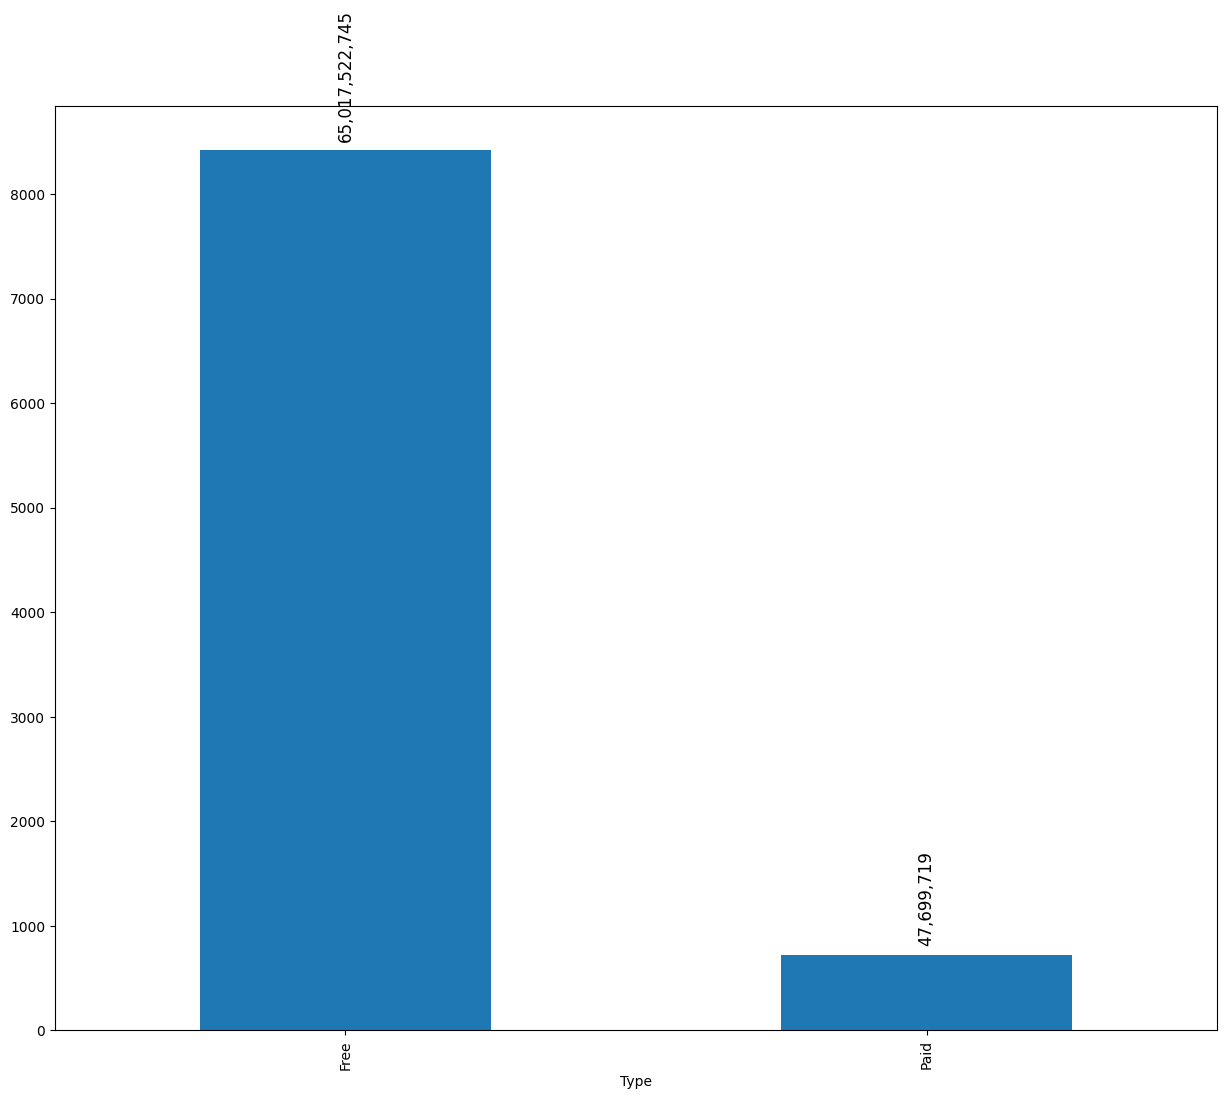

In [111]:
install_type = ps_data.groupby('Type')['Installs'].agg(['count','sum']).sort_values(by = 'count', ascending=False)
install_type['sum'] = install_type['sum'].apply(lambda x: format(x, ',.0f'))
print(install_type)
plt.figure(figsize = (15,12))
ps_data.groupby('Type')['Installs'].count().sort_values(ascending=False).plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
for i, v in enumerate(install_type['sum']):
  ax.text(i, install_type.iloc[i]['count']+120, v, ha='center', fontsize=12, rotation='vertical')
plt.show()

Type vs Install
1. most no of counts and total no of installs is Everyone, Teen , Mature 17+, Everyt One 10+, Adults only 18+, Unrated



                 count             sum
Content Rating                        
Everyone          7414  41,245,772,278
Teen               987  12,258,368,768
Mature 17+         406   1,372,359,178
Everyone 10+       332  10,187,171,740
Adults only 18+      2       1,500,000
Unrated              2          50,500


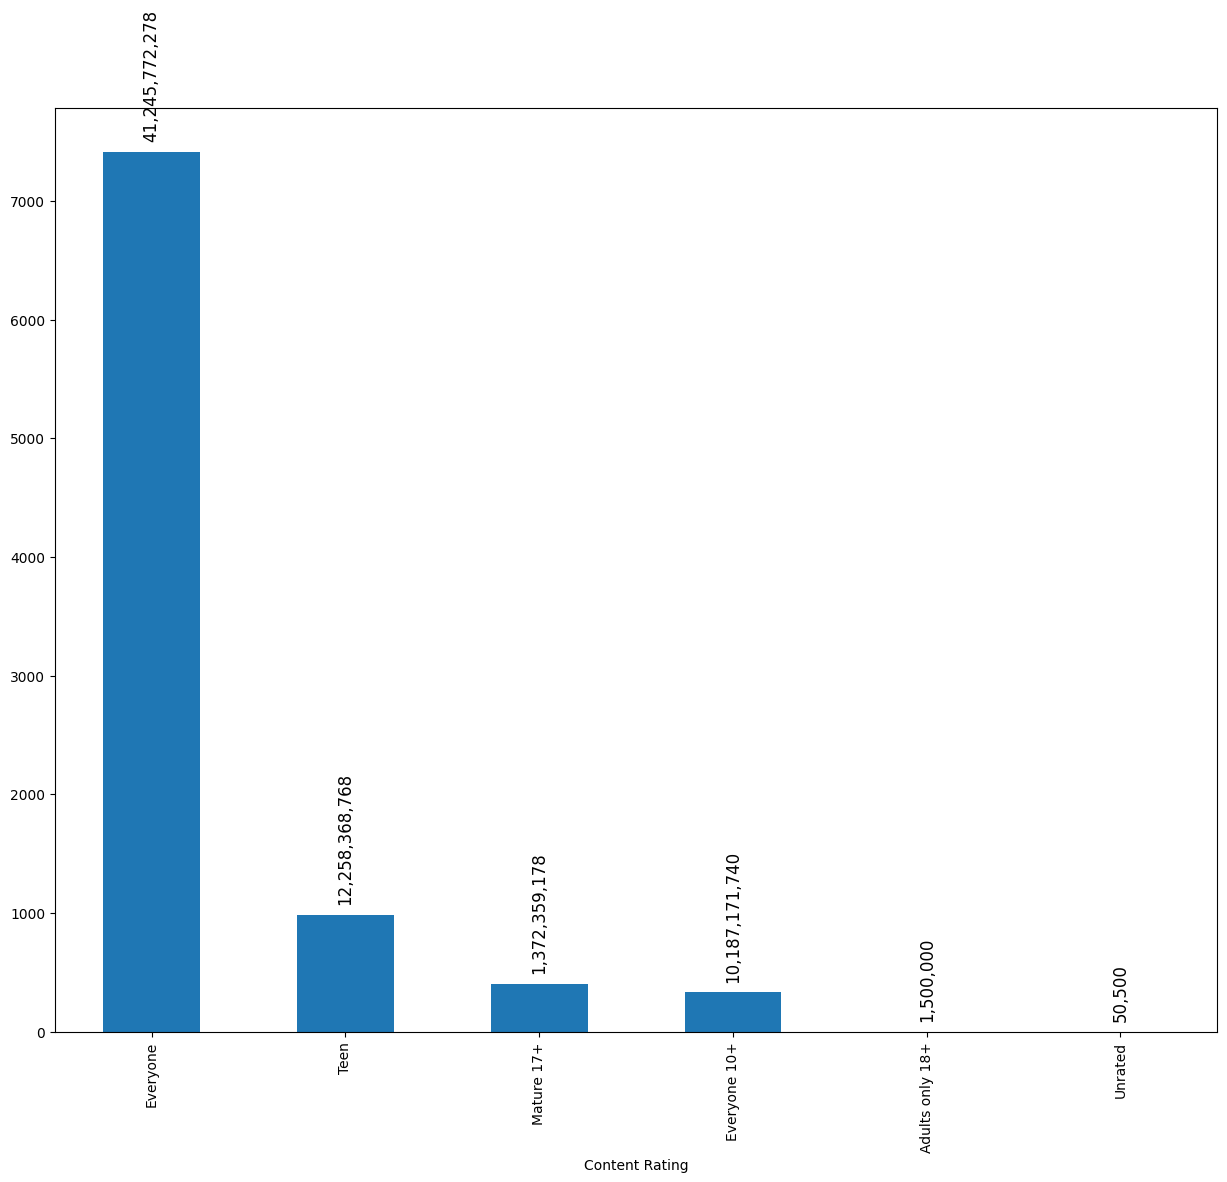

In [112]:
install_content = ps_data.groupby('Content Rating')['Installs'].agg(['count','sum']).sort_values(by = 'count', ascending=False)	
install_content['sum'] = install_content['sum'].apply(lambda x: format(x, ',.0f'))
print(install_content)
plt.figure(figsize = (15,12))
ps_data.groupby('Content Rating')['Installs'].count().sort_values(ascending=False).plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
for i,v in enumerate(install_content['sum']):
  ax.text(i, install_content.iloc[i]['count']+120, v, ha='center', fontsize=12, rotation='vertical')
plt.show()

Insights for installs vs Updated month


1.   Most no apps installs in the month od july followed by jun, aug, may, mar, Apr, Feb, Jan, Dec, Oct, Nov, Sep



               count             sum
Updated_Month                       
Jul             2520  32,191,835,797
Jun             1106   5,988,980,824
Aug             1104  15,268,151,698
May              866   4,849,522,607
Mar              611     841,660,715
Apr              565   2,104,637,619
Feb              495     635,599,300
Jan              448     844,319,661
Dec              398     630,697,147
Oct              380     533,561,574
Nov              361     830,296,297
Sep              289     345,959,225


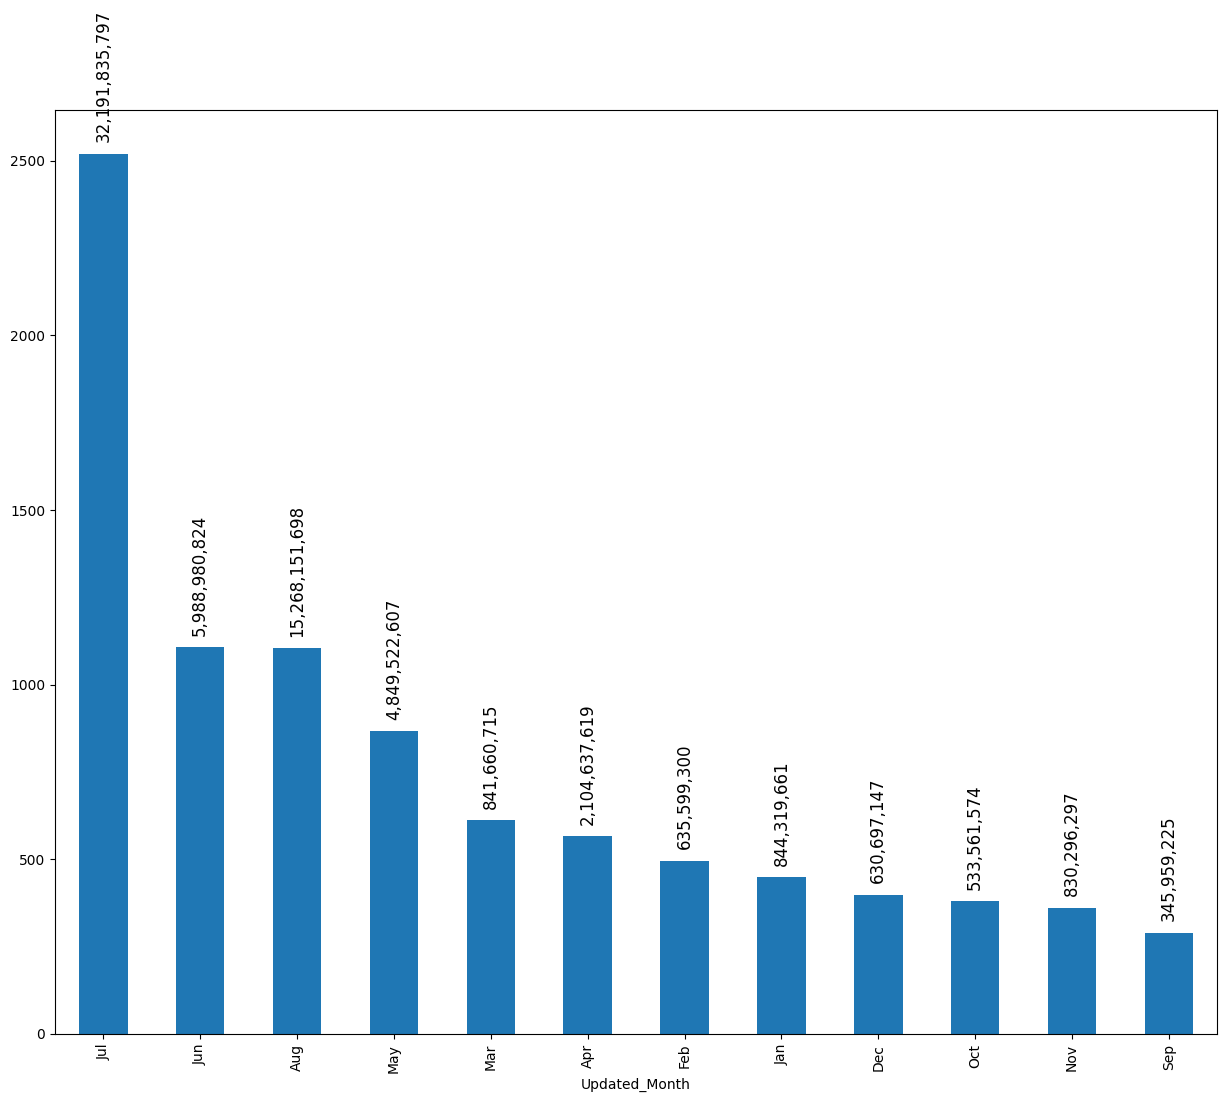

In [113]:
install_updatedmonth = ps_data.groupby('Updated_Month')['Installs'].agg(['count','sum']).sort_values(by = 'count', ascending=False)
install_updatedmonth['sum'] = install_updatedmonth['sum'].apply(lambda x:format(x, ',.0f'))
print(install_updatedmonth)
plt.figure(figsize = (15,12))
ps_data.groupby('Updated_Month')['Installs'].count().sort_values(ascending=False).plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
for i,v in enumerate(install_updatedmonth['sum']):
  ax.text(i, install_updatedmonth.iloc[i]['count']+45, v, ha='center', fontsize=12, rotation='vertical')
plt.show()

Install vs update year

1.   Most no of apps installed which are updated in the year 18 followed by 17, 16,15,14,13,12,11



              count             sum
Updated_Year                       
18             5866  60,663,329,933
17             1738   2,676,178,668
16              749     952,793,592
15              443     386,824,370
14              201     254,605,226
13              105     100,091,365
12               25      13,892,210
11               15      17,407,100
10                1         100,000
Axes(0.125,0.11;0.775x0.77)


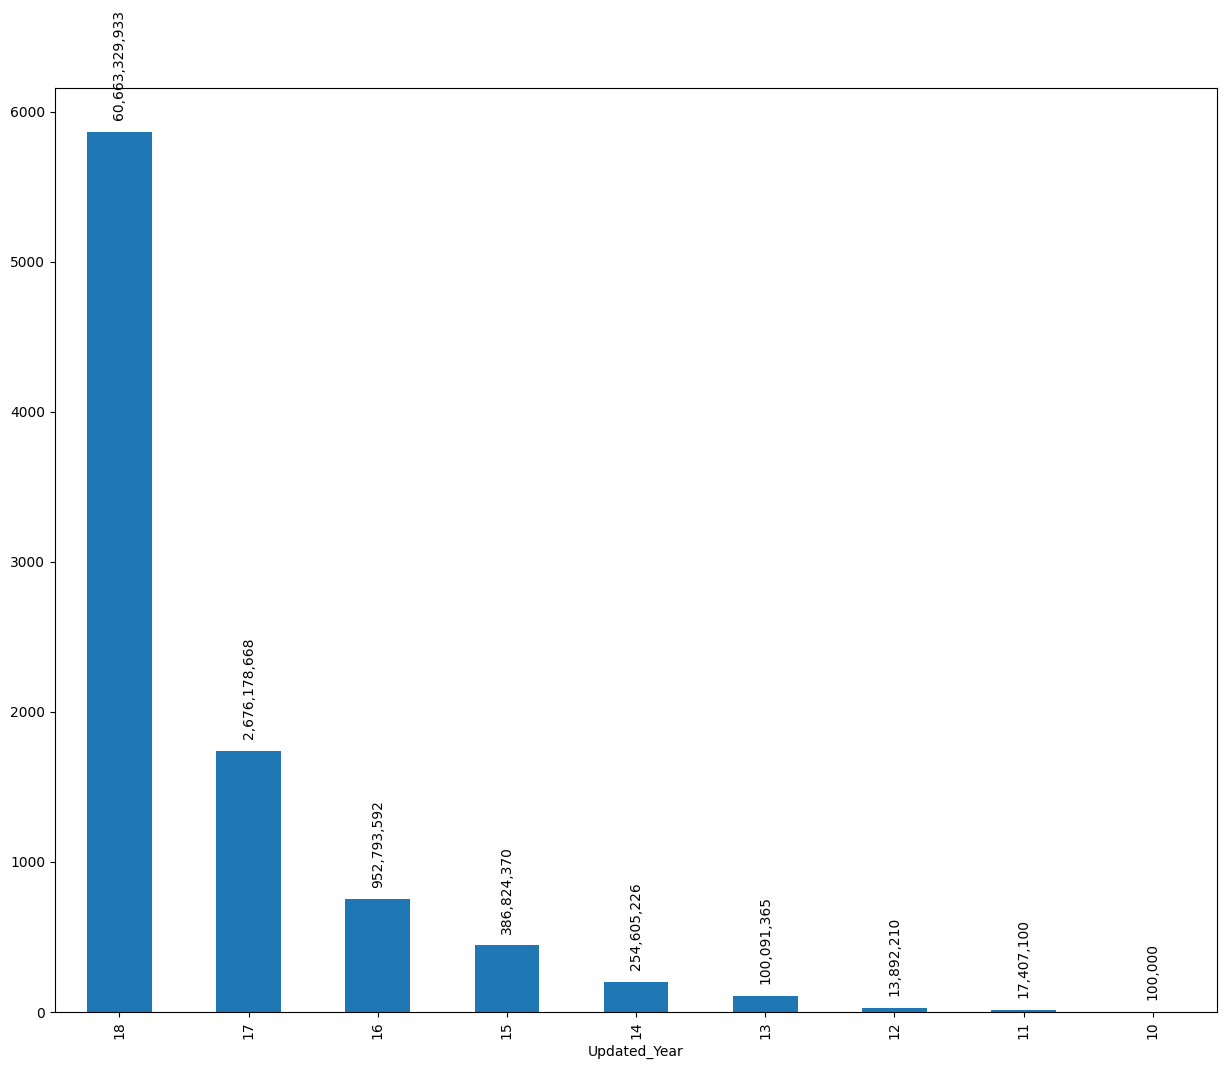

In [114]:
install_year = ps_data.groupby('Updated_Year')['Installs'].agg(['count','sum']).sort_values(by = 'count', ascending=False)
install_year['sum'] = install_year['sum'].apply(lambda x: format(x, ',.0f'))
print(install_year)
plt.figure(figsize = (15,12))
print(ps_data.groupby('Updated_Year')['Installs'].count().sort_values(ascending=False).plot(kind='bar'))
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
for i, v in enumerate(install_year['sum']):
  ax.text(i, install_year.iloc[i]['count']+100, v, ha='center', rotation = 'vertical')
plt.show()


#### 3) Check the presence of outliers. Use Boxplot as well suitable mathematical method to detect, If outliers are there for particular features then decide whether you will treat them or not. If yes, do the treatment.


* Outliers are present in almost all the columns, we are removing through The IQR method



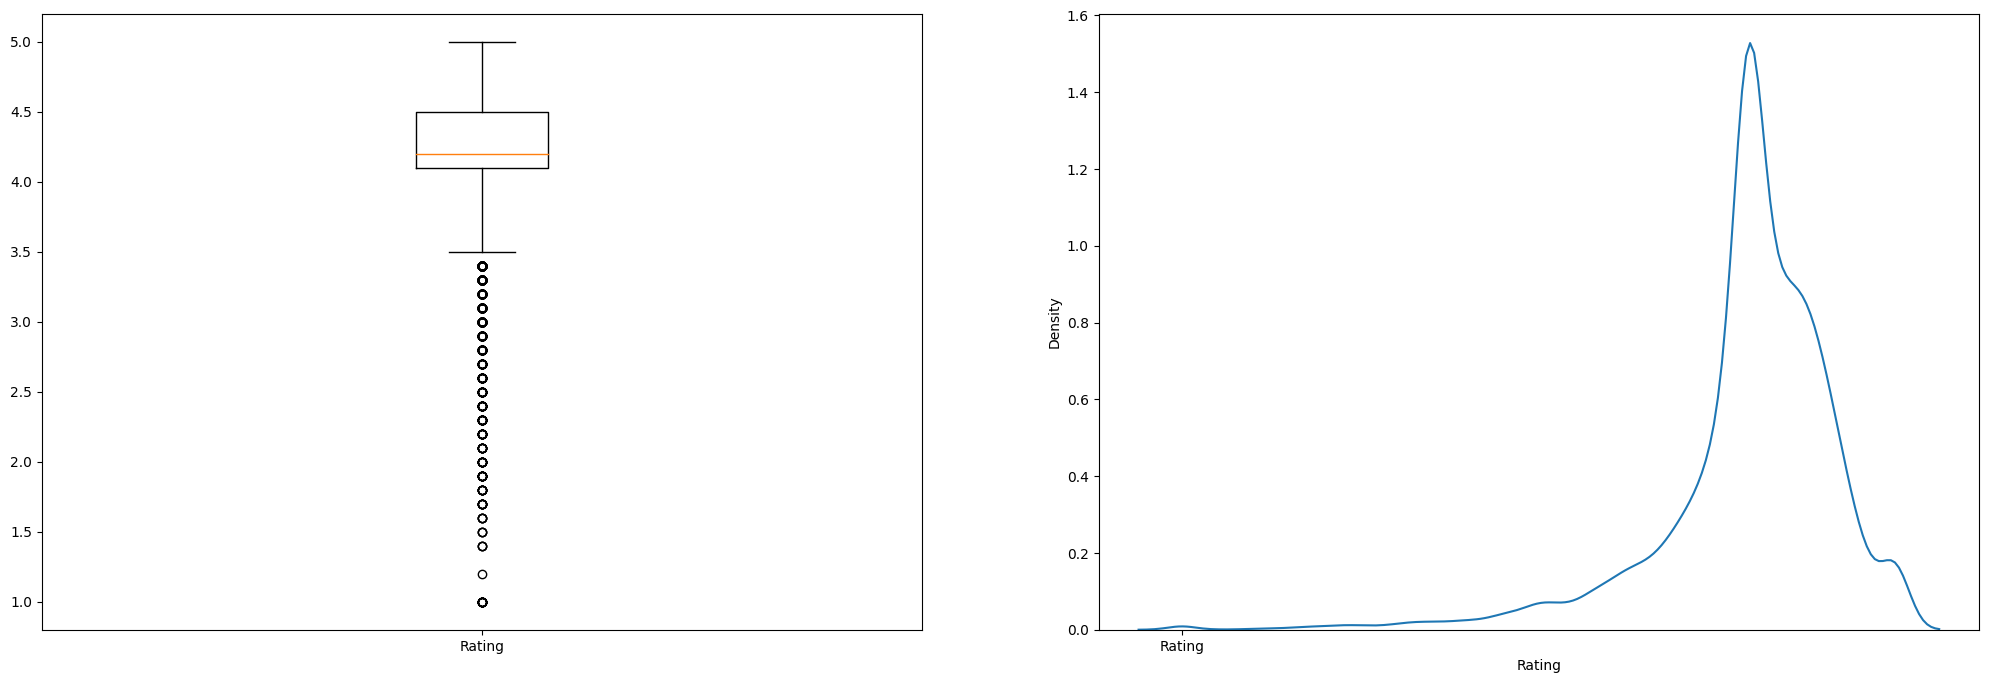

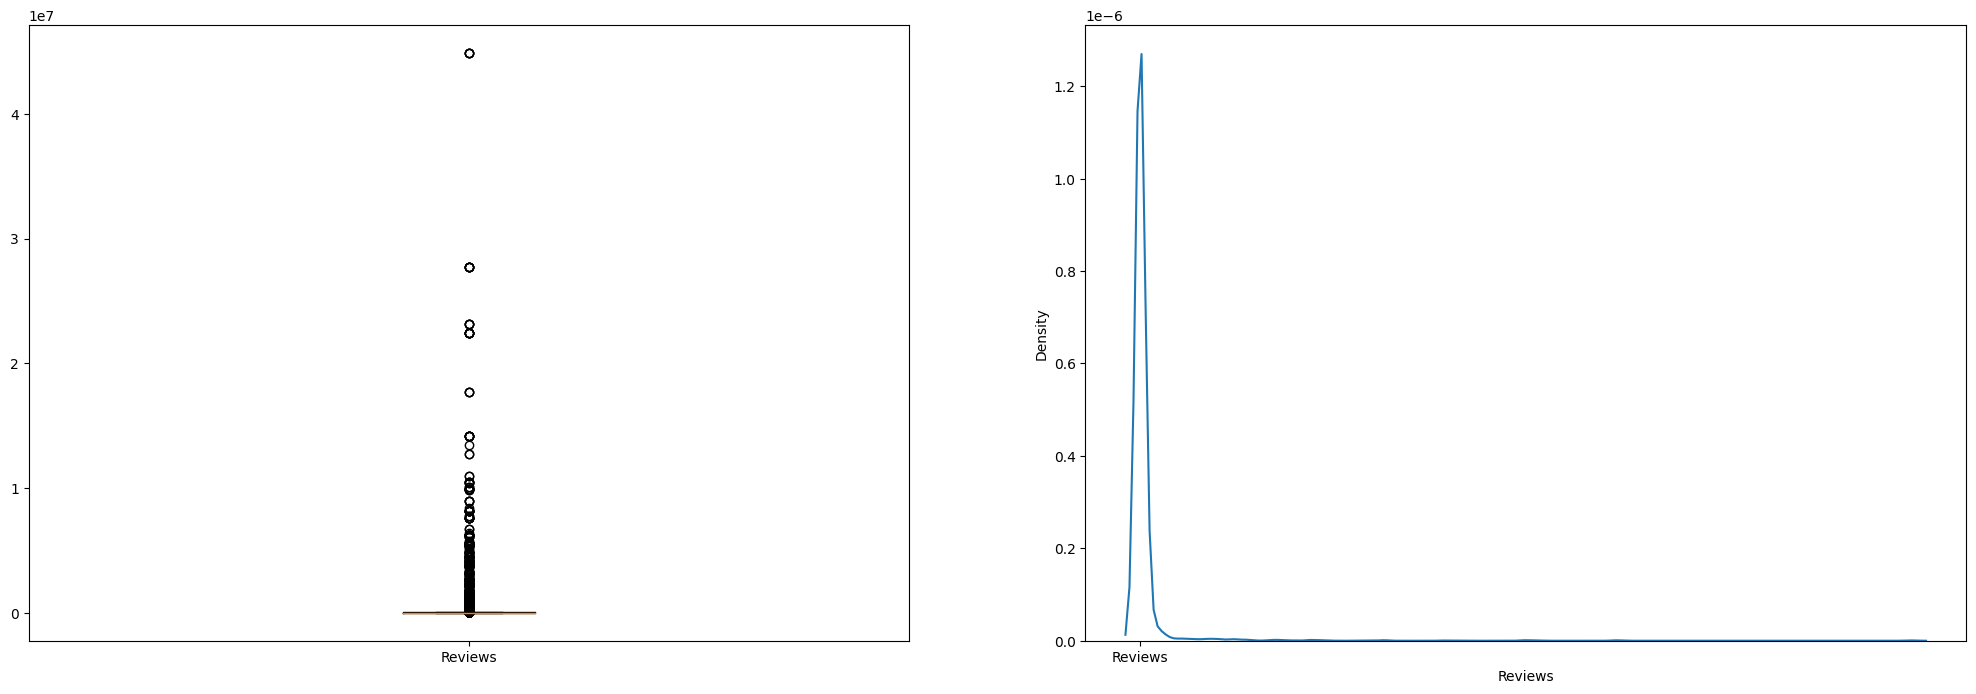

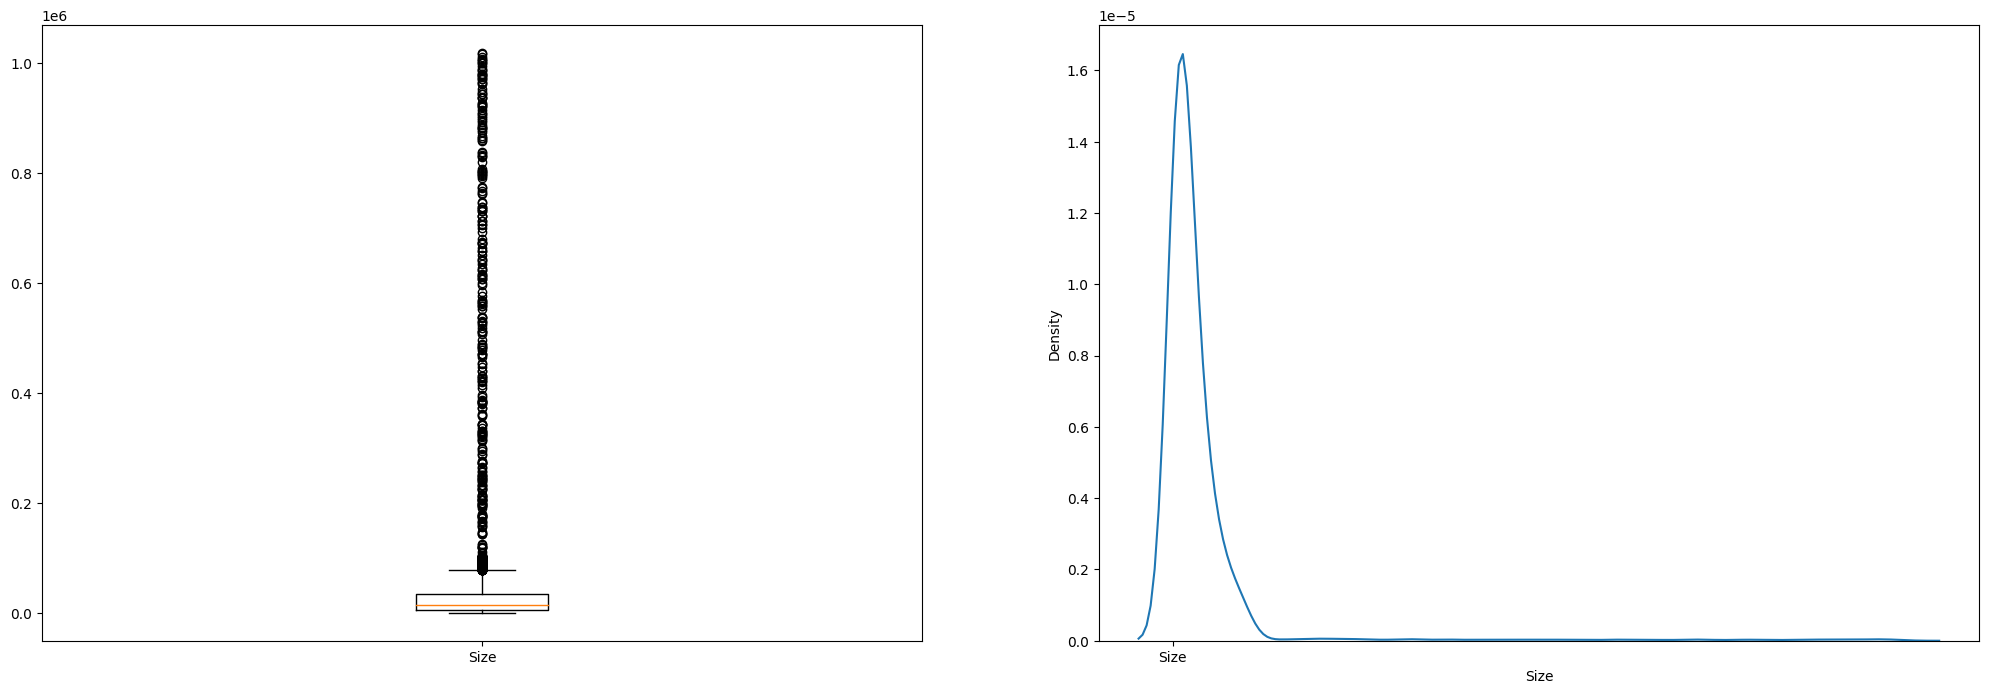

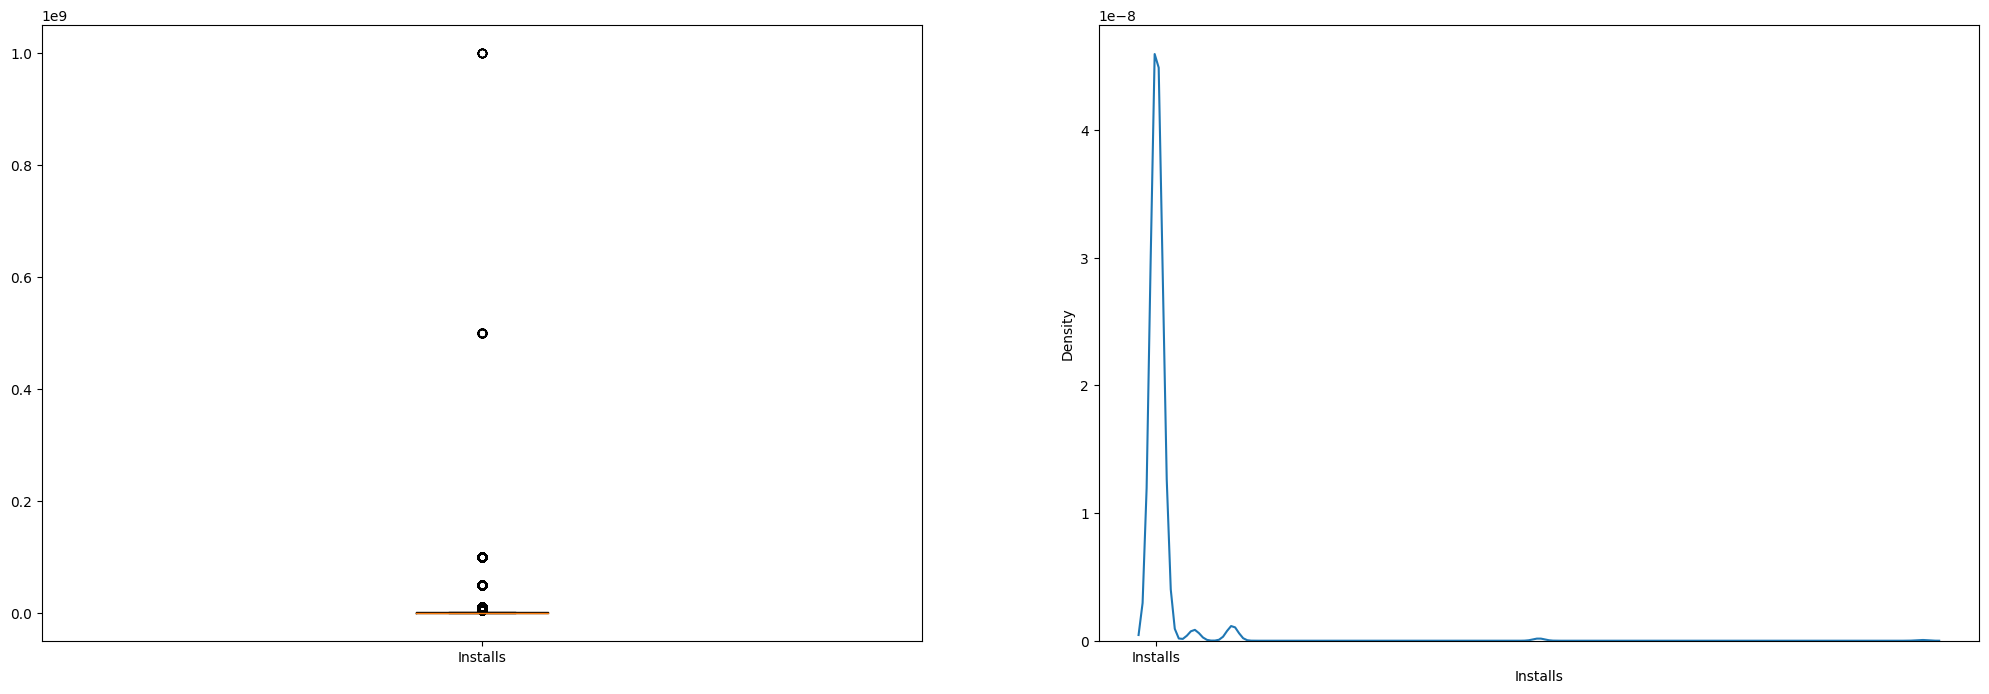

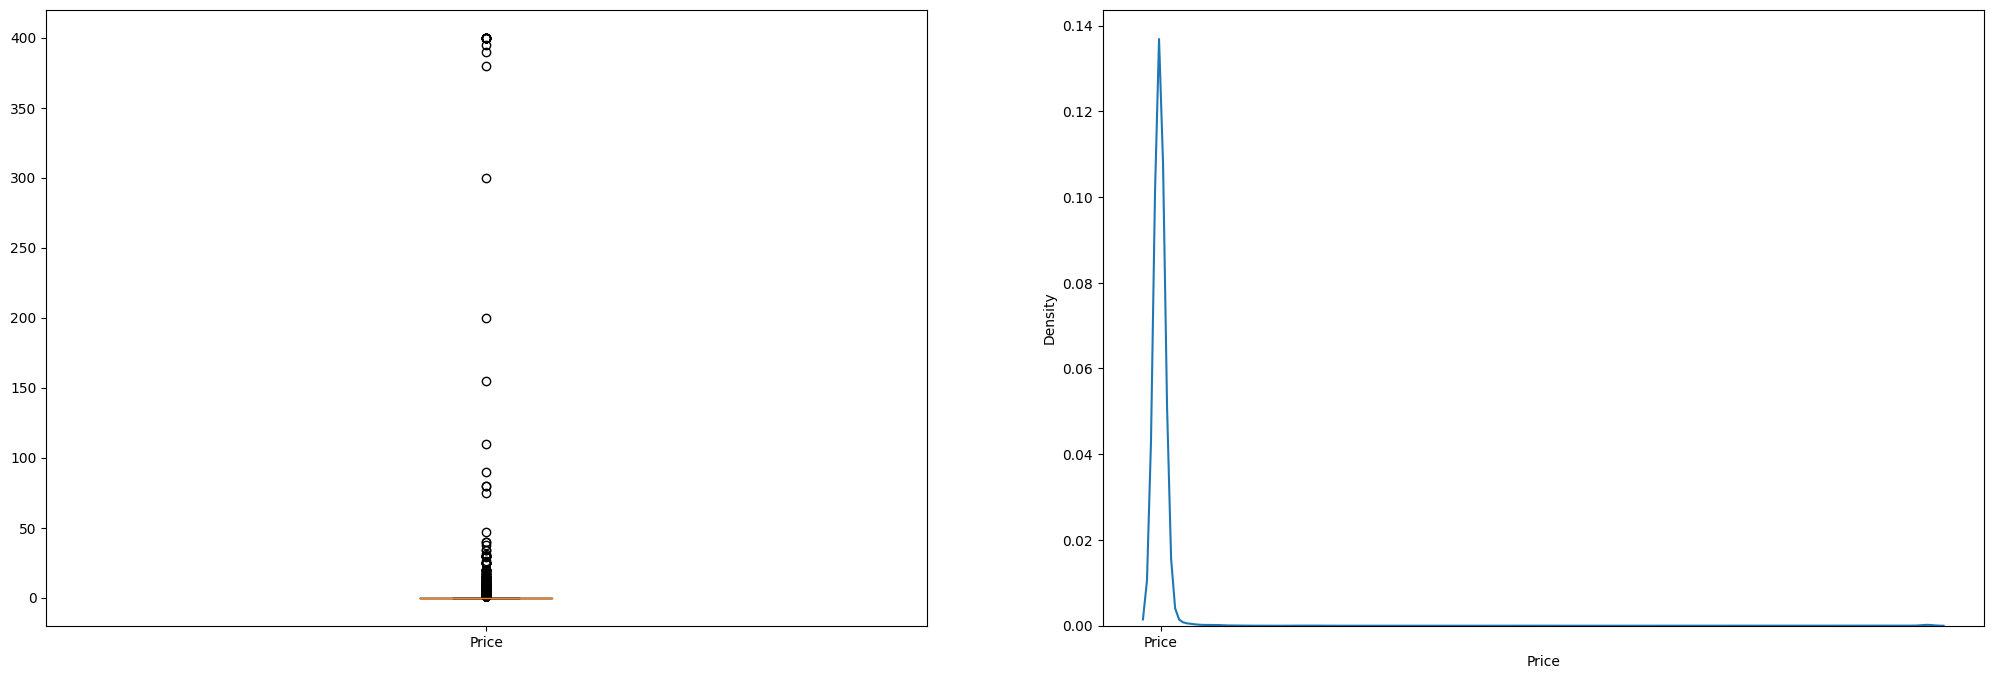

In [115]:
for col in ps_data.columns:
  if ps_data[col].dtype != 'object':
    fig, ax = plt.subplots(figsize = (25,8), nrows = 1, ncols = 2)
    ax[0].boxplot(ps_data[col])
    sns.kdeplot(ps_data[col], ax = ax[1])
    ax[0].set_xticks([1])
    ax[0].set_xticklabels([col])
    ax[1].set_xticks([1])
    ax[1].set_xticklabels([col])

Removing the outliers and generating the graph

<ipython-input-116-13cfc39b4393>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ps_data[col], ax = ax[1])


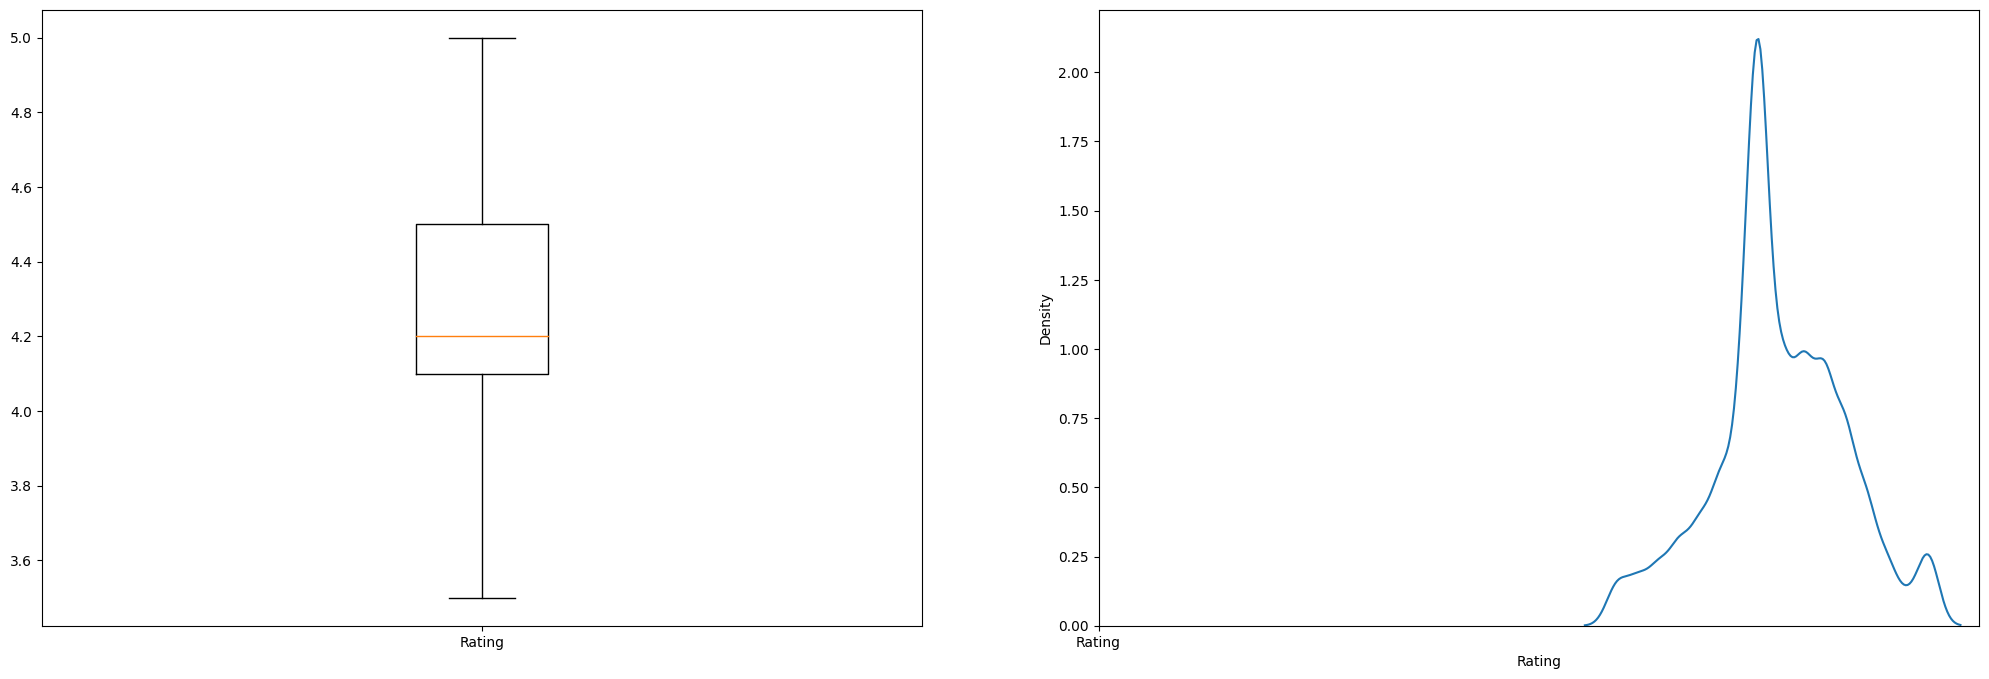

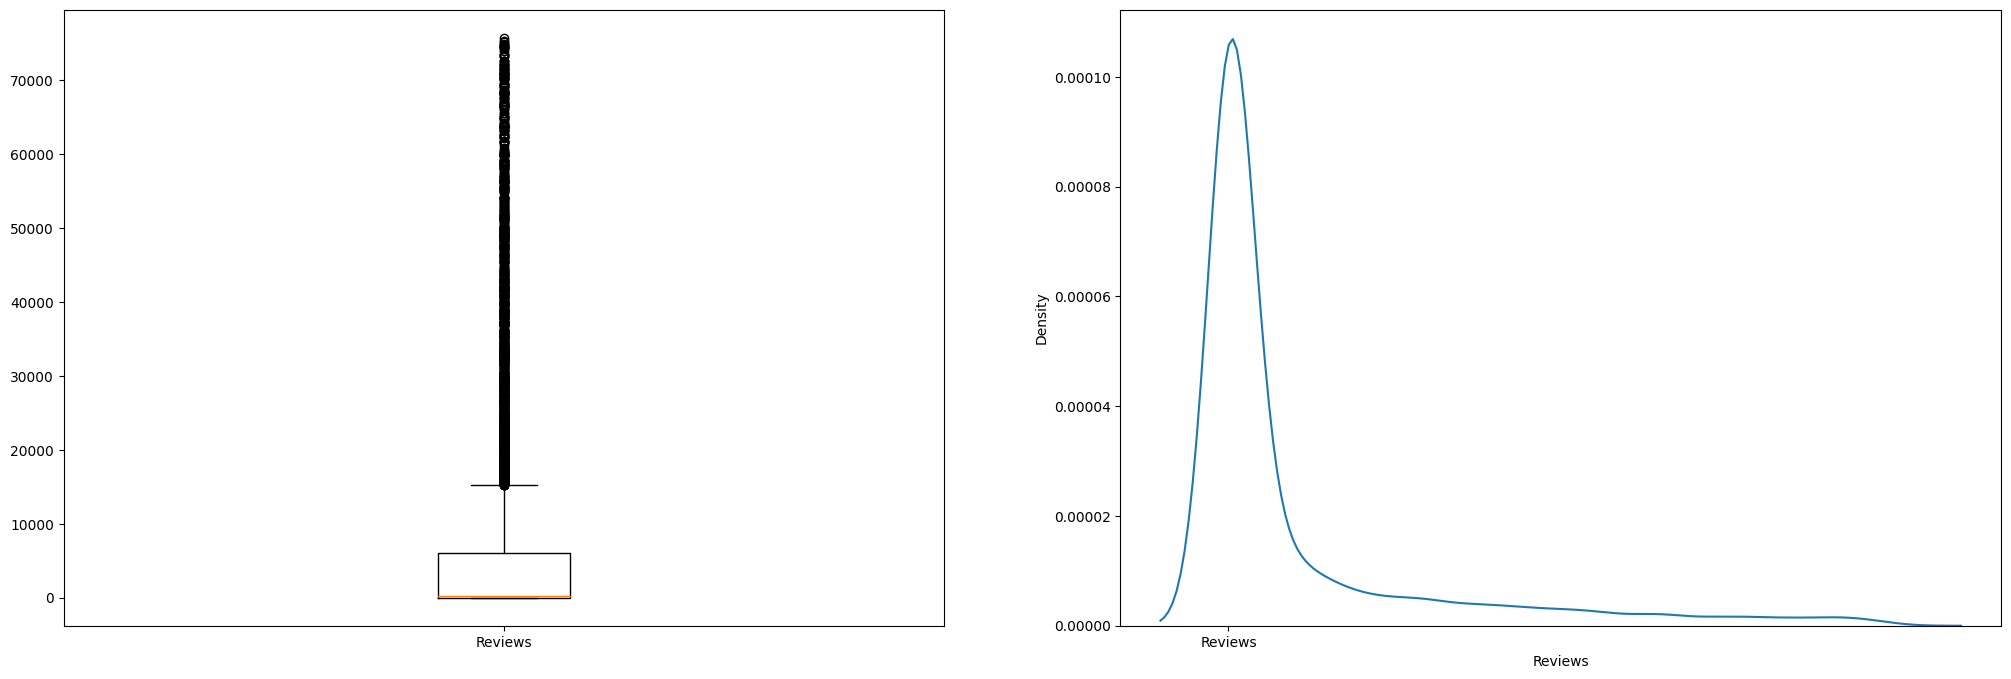

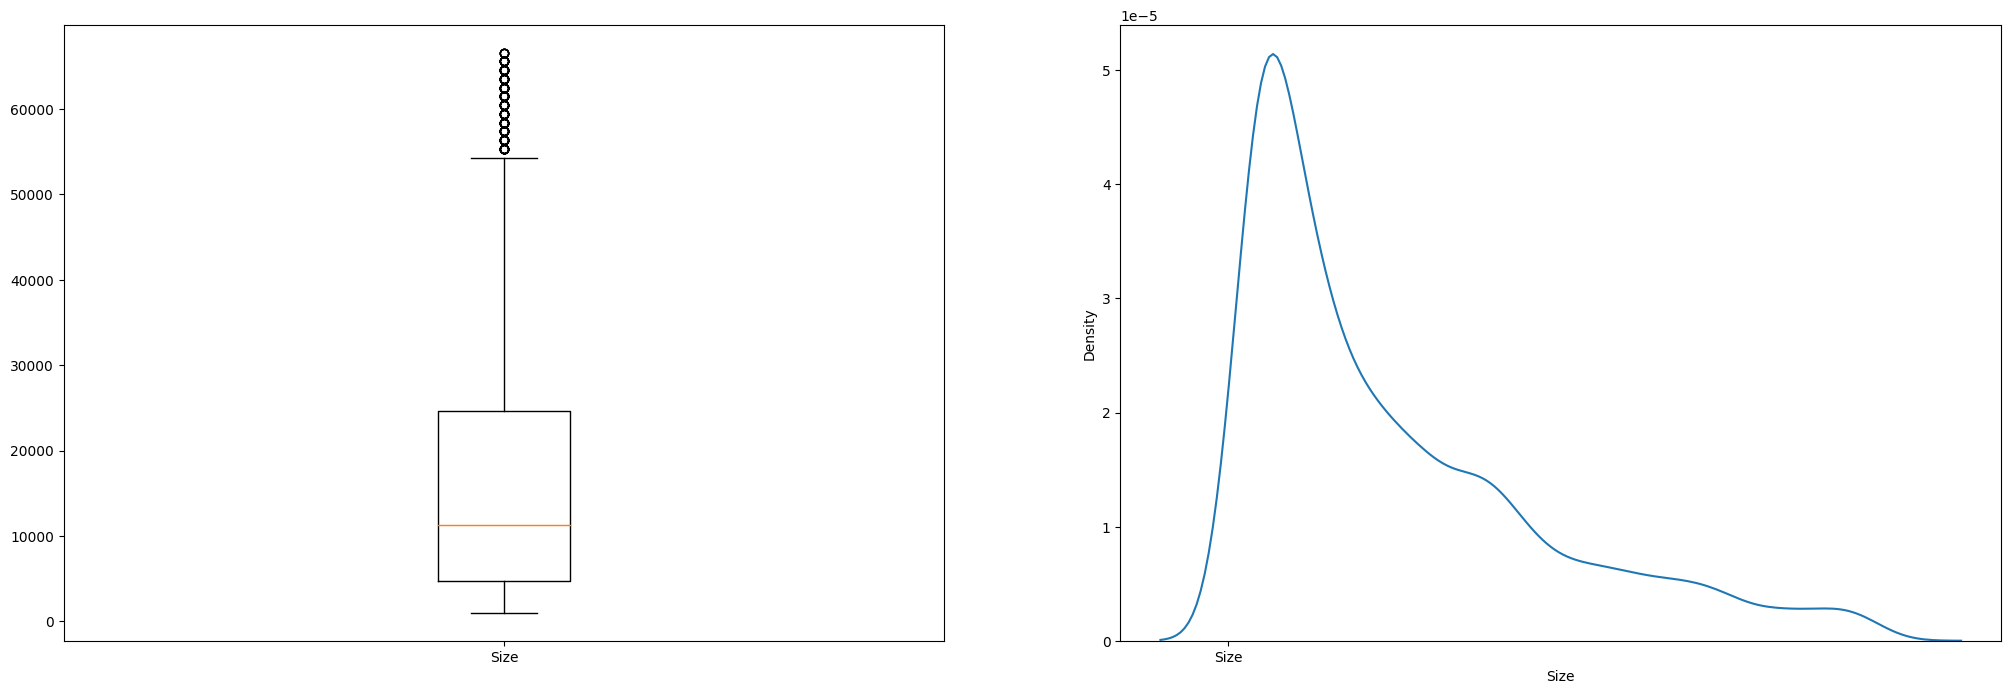

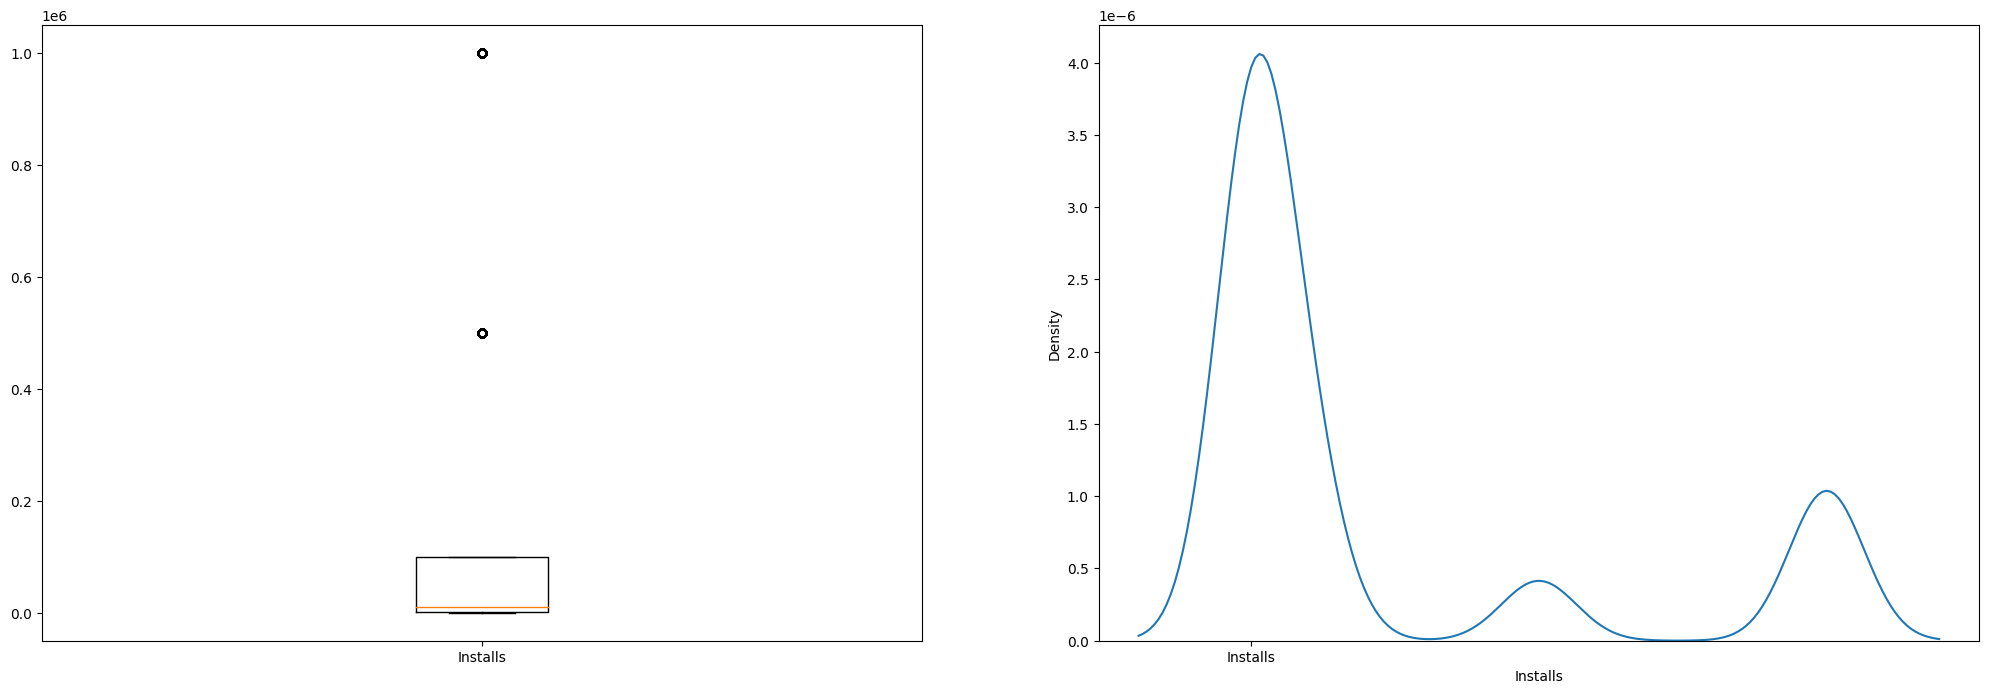

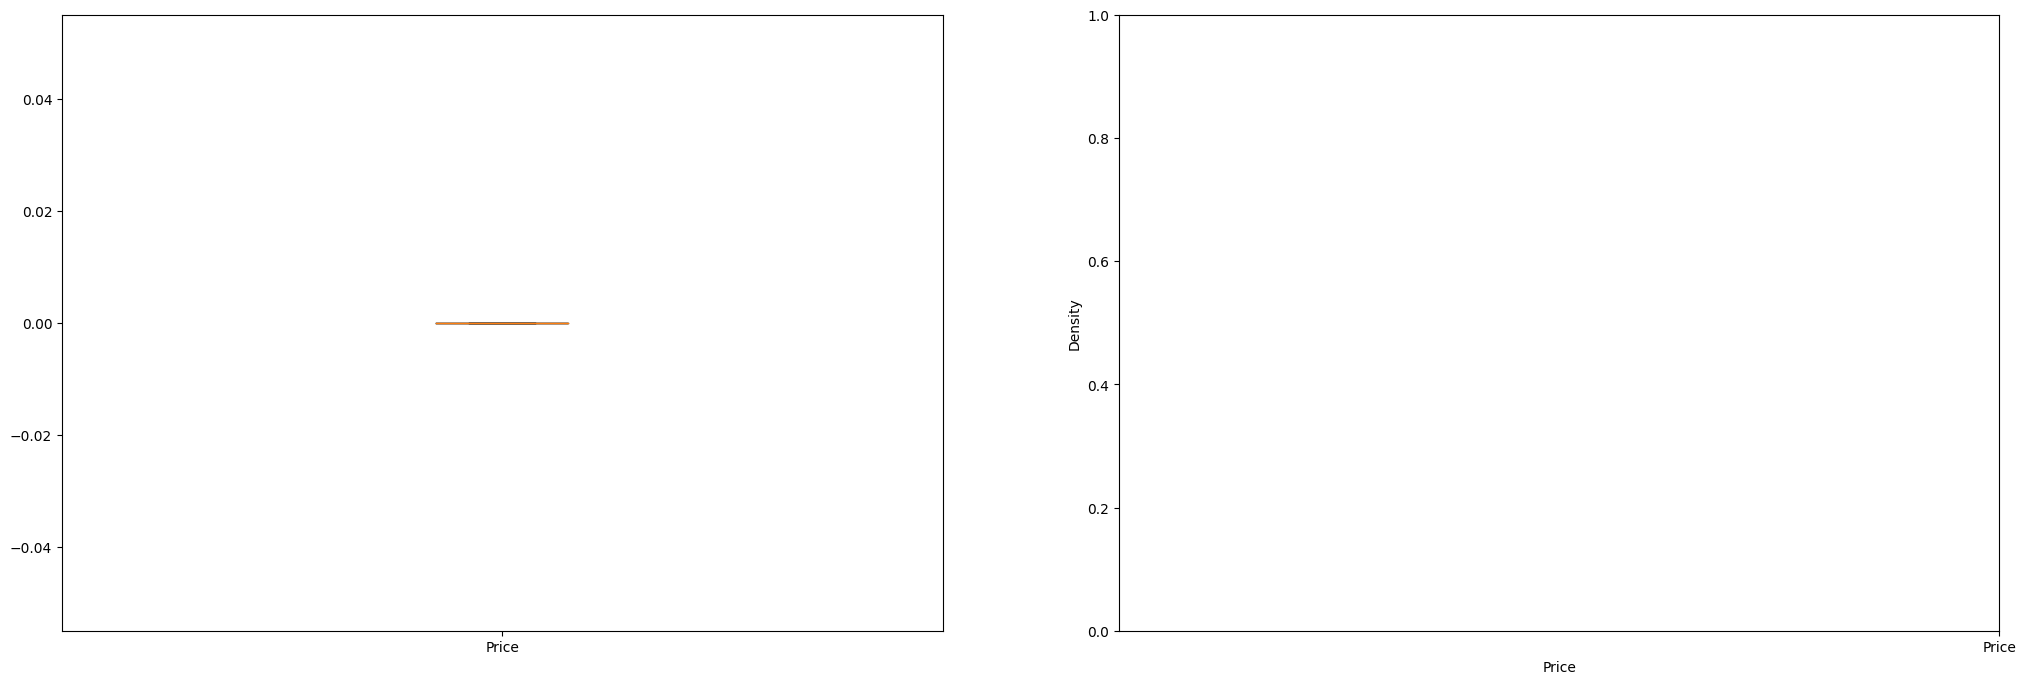

In [116]:
for col in ps_data.columns:
  if ps_data[col].dtype != 'object':
    q1 = ps_data[col].quantile(0.25)
    q3 = ps_data[col].quantile(0.75)
    iqr = q3 - q1
    #print('\n',col,'\n')
    upper_bound = q3 + 1.5*iqr
    #print(upper_bound)
    lower_bound = q1 - 1.5*iqr
    #print(lower_bound)
    ps_data = ps_data[(ps_data[col] >= lower_bound) & (ps_data[col] <= upper_bound)]
    fig, ax = plt.subplots(figsize = (25,8), nrows = 1, ncols = 2)
    ax[0].boxplot(ps_data[col])
    sns.kdeplot(ps_data[col], ax = ax[1])
    ax[0].set_xticks([1])
    ax[0].set_xticklabels([col])
    ax[1].set_xticks([1])
    ax[1].set_xticklabels([col])

# print(ps_data)

<b>4)	 Check for multicollinearity. If it is there do the necessary treatment.</b>





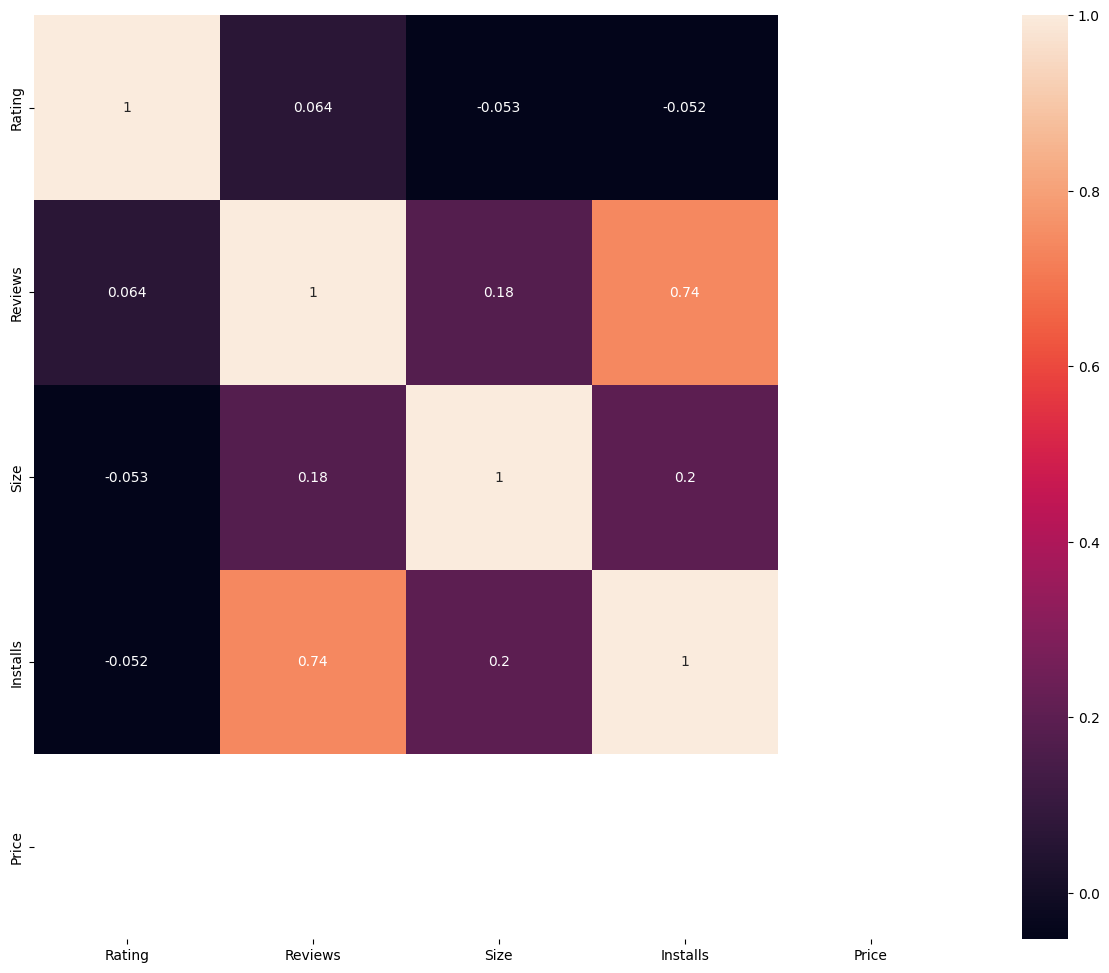

In [117]:
corr = ps_data.corr()

# check if the correlation matrix has any non-zero values
if corr.empty or np.allclose(corr, 0):
    print("The correlation matrix is empty or has no non-zero values.")
else:
    # plot the correlation matrix
    plt.figure(figsize=(15,12))
    sns.heatmap(data=corr, annot=True)
    plt.show()

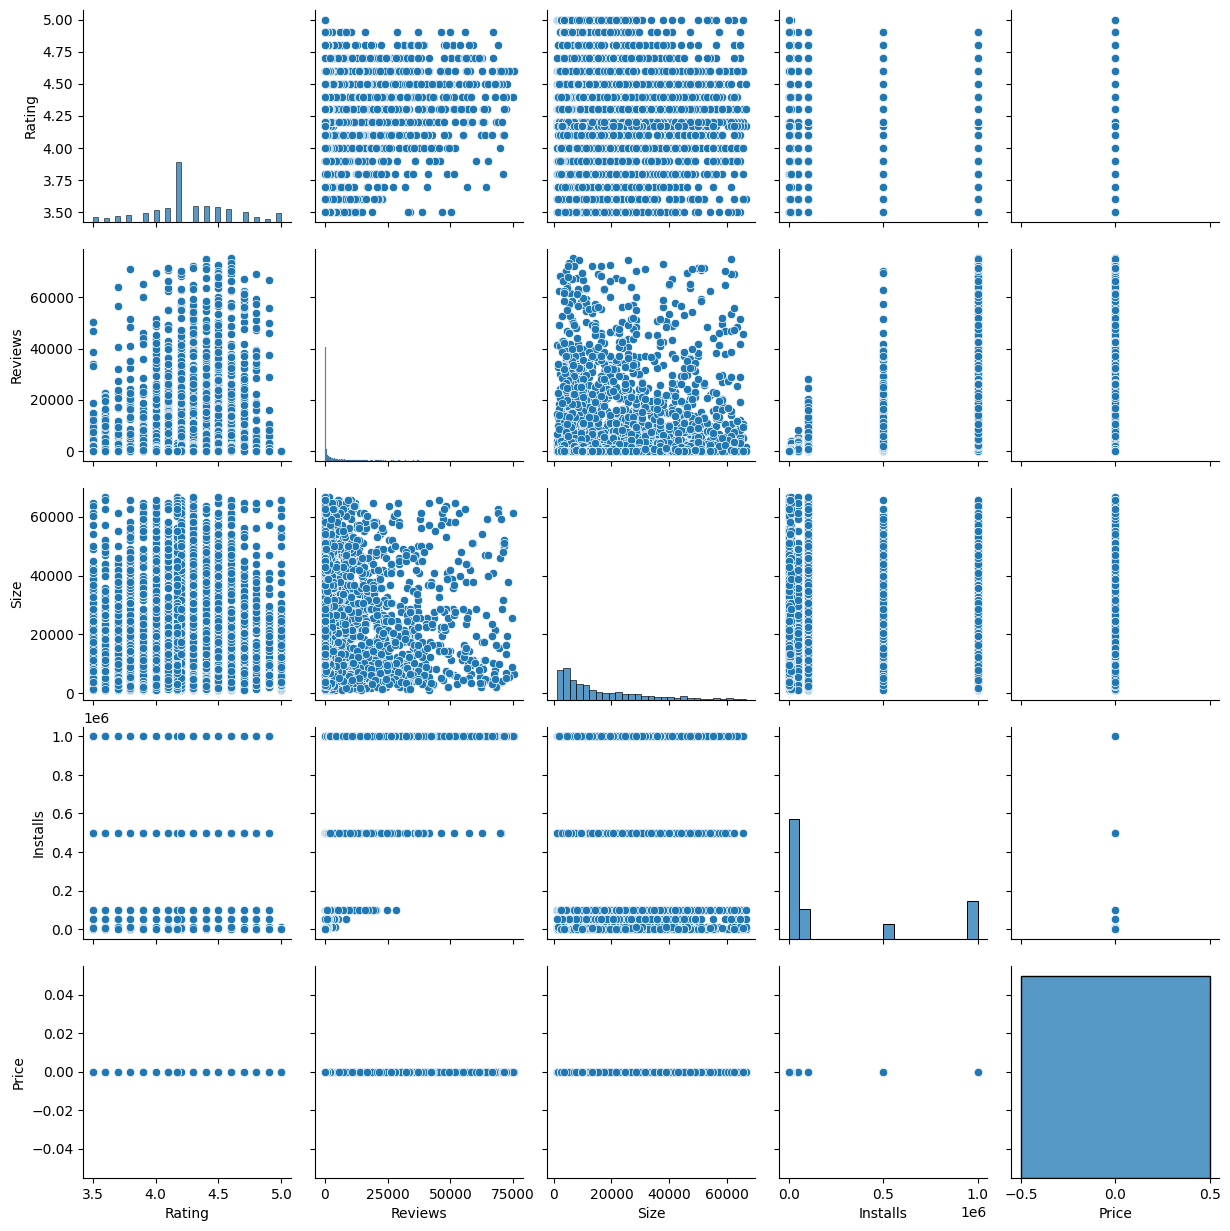

In [118]:
sns.pairplot(data = ps_data)

We are doing teh Label Encoder to convert categorical variable to the numeric

In [119]:
encoder = LabelEncoder()
for col in ps_data.columns:
  if ps_data[col].dtype ==  'object':
    ps_data[col] = encoder.fit_transform(ps_data[col])

In [120]:
ps_data.shape

(5514, 12)

In [121]:
ps_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Updated_Month,Updated_Year
0,0,4.1,159,19456.0,10000,0,0.0,1,6,14,4,7
1,0,3.9,967,14336.0,500000,0,0.0,1,9,14,4,7
4,0,4.3,967,2867.2,100000,0,0.0,1,8,18,6,7
5,0,4.4,167,5734.4,50000,0,0.0,1,6,8,7,6
6,0,3.8,178,19456.0,50000,0,0.0,1,6,14,0,7


In [122]:
ps_data.shape

(5514, 12)

In [123]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5514 entries, 0 to 10838
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        5514 non-null   int64  
 1   Rating          5514 non-null   float64
 2   Reviews         5514 non-null   int64  
 3   Size            5514 non-null   float64
 4   Installs        5514 non-null   int64  
 5   Type            5514 non-null   int64  
 6   Price           5514 non-null   float64
 7   Content Rating  5514 non-null   int64  
 8   Genres          5514 non-null   int64  
 9   Android Ver     5514 non-null   int64  
 10  Updated_Month   5514 non-null   int64  
 11  Updated_Year    5514 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 560.0 KB


In [124]:
ps_data.shape

(5514, 12)

In [125]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5514 entries, 0 to 10838
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        5514 non-null   int64  
 1   Rating          5514 non-null   float64
 2   Reviews         5514 non-null   int64  
 3   Size            5514 non-null   float64
 4   Installs        5514 non-null   int64  
 5   Type            5514 non-null   int64  
 6   Price           5514 non-null   float64
 7   Content Rating  5514 non-null   int64  
 8   Genres          5514 non-null   int64  
 9   Android Ver     5514 non-null   int64  
 10  Updated_Month   5514 non-null   int64  
 11  Updated_Year    5514 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 560.0 KB


In [126]:
# # ps_data_new = ps_data.merge(ps_data_outlier, left_index=True, right_index=True, how='inner')
# ps_data_new = ps_data.merge(ps_data_outlier, left_index=True, right_index=True, how='inner')

In [127]:
ps_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Updated_Month,Updated_Year
0,0,4.1,159,19456.0,10000,0,0.0,1,6,14,4,7
1,0,3.9,967,14336.0,500000,0,0.0,1,9,14,4,7
4,0,4.3,967,2867.2,100000,0,0.0,1,8,18,6,7
5,0,4.4,167,5734.4,50000,0,0.0,1,6,8,7,6
6,0,3.8,178,19456.0,50000,0,0.0,1,6,14,0,7


<b>5)	Do for successful model building, it requires scaling. If yes, how you encounter it. Explain</b>


*   Yes, scaling is often an important step in the model building process to improve the performance of the model. Scaling refers to the process of transforming the data to a common scale or range, typically between 0 and 1 or -1 and 1, so that each feature contributes equally to the model's output.
*  here i am using the standard scaler method 


---


<b>6)	Prepare at-least 4 models for this problem statement.</b>


*   Yes, Prepared the KNN, Random Forest, Ada Boost, XG Boost Models



---


<b>7)	Evaluate your models and select it based on different evaluation parameters, Write significance also.</b>
* For Regression Problem Different Evaluation Parameters are RMSE and R-squared
  * R - squares tell the how well the model predicts the output 
  * RMSE Tells The how much Amount Varies from Actual dataPoint



1.   R - square and RMSE For random Forest 
  * RMSE: 163551.76023204136
  * R-squared: 0.8223694870386702
2.  R - square and RMSE For KNN 
  * RMSE: 253073.5116
  * R-squared: 0.5747
3. R - square and RMSE For Ada Boost
  * RMSE: 159398.9526
  * R-squared: 0.8313
4. R - square and RMSE For XG Boost
  * RMSE: 163373.8660
  * R-squared: 0.8223694870386702
5. R - square and RMSE For Linear regression
  * RMSE: 253299.62512689037
  * R-squared: 0.686

<b> Ada Boost Is Predicting 83% data correctly with RMSE : 159398</b>

---
 <b>8)	Identify the features which you think are the most needed for good installment prediction.</b>
1.   from Random Forest We can check the Feature Importance 
  * Reviews  :  0.847565
  * Rating  :  0.035721
  * Size  :  0.033880
  * Android Ver  : 0.017634
  * Genres  :  0.017422
  * Updated_Month  :  0.016935
  * Category  :   0.016311
  * Content Rating  : 0.008839
  * Updated_Year  :  0.005693
  * Type    0.000000
  * Price    0.000000

---



<b>9)	Predict installments for at-least 10 data points.</b>


*   Yes Predicted the 10 data points For Each Model



Random Forest

MSE: 23125662500.86612
RMSE: 152071.241531284
R-squared: 0.8396643286131001
Feature importance
            feature  importance
2          Reviews    0.847565
1           Rating    0.035721
3             Size    0.033880
8      Android Ver    0.017634
7           Genres    0.017422
9    Updated_Month    0.016935
0         Category    0.016311
6   Content Rating    0.008839
10    Updated_Year    0.005693
4             Type    0.000000
5            Price    0.000000
Actual		Predicted
100000.00		637000.00
100.00		316.60
1000000.00		664000.00
50000.00		49950.00
1000.00		1056.10
1000.00		2910.00
10.00		10.59
100000.00		85800.00
5000.00		4631.00
10.00		297.10


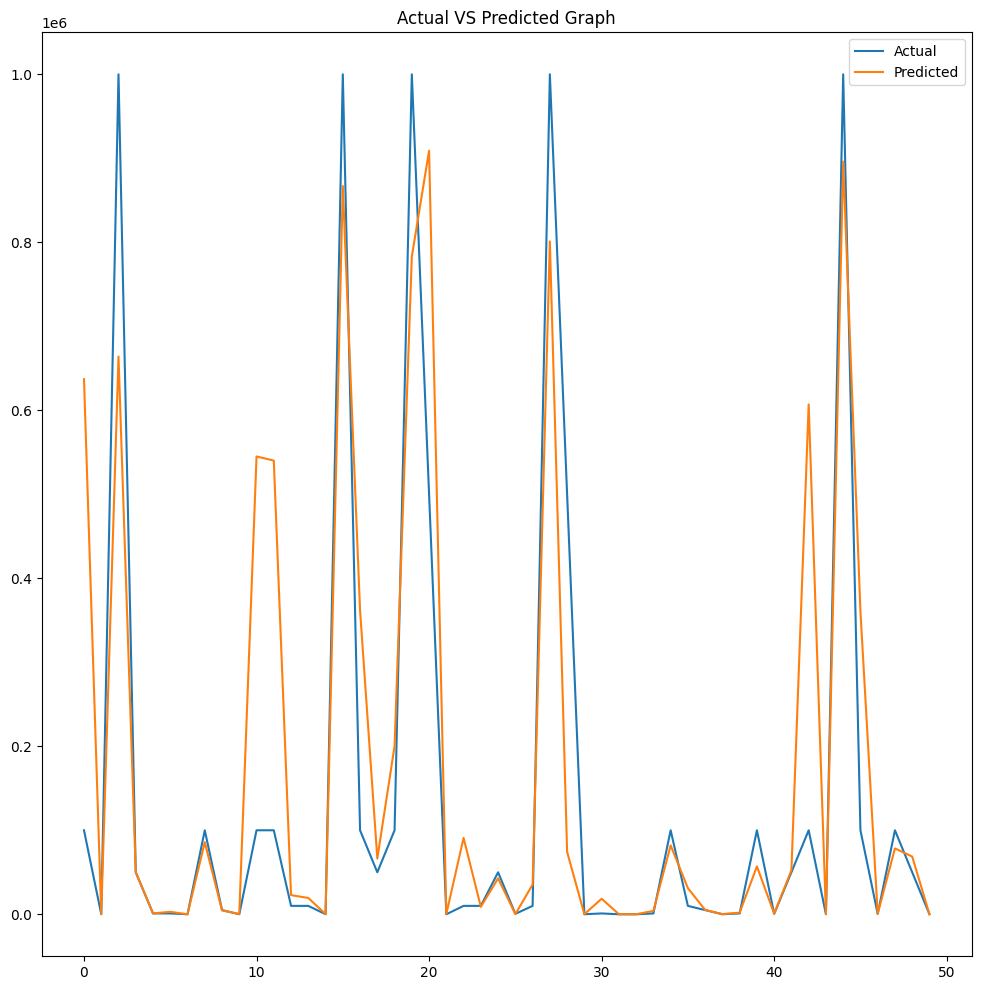

In [128]:
X = ps_data.drop(['Installs'], axis = 1)
y = ps_data['Installs']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Compute feature importances and display them in a sorted dataframe
column_names = X.columns
result_df = pd.DataFrame({'feature': column_names, 'importance': feature_importances})
result_df = result_df.sort_values('importance', ascending=False)
print('Feature importance\n', result_df)

print('Actual\t\tPredicted')
for actual, predicted in zip(y_test[:10].values, y_pred[:10]):
    print(f'{actual:.2f}\t\t{predicted:.2f}')
plt.figure(figsize = (12,12))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Actual VS Predicted Graph')
plt.legend()
plt.show()

KNN Algorithm

Mean squared error: {0:0.4f} 43079991660.68433
Root Mean squared error: 207557.2009
R-squared score: 0.7013
Actual		Predicted
100000.00		167966.67
100.00		10441.67
1000000.00		227250.00
50000.00		15594.17
1000.00		48975.08
1000.00		21438.83
10.00		7.58
100000.00		15942.50
5000.00		44666.67
10.00		285.17
Actual		Predicted
100000.00		167966.67
100.00		10441.67
1000000.00		227250.00
50000.00		15594.17
1000.00		48975.08
1000.00		21438.83
10.00		7.58
100000.00		15942.50
5000.00		44666.67
10.00		285.17


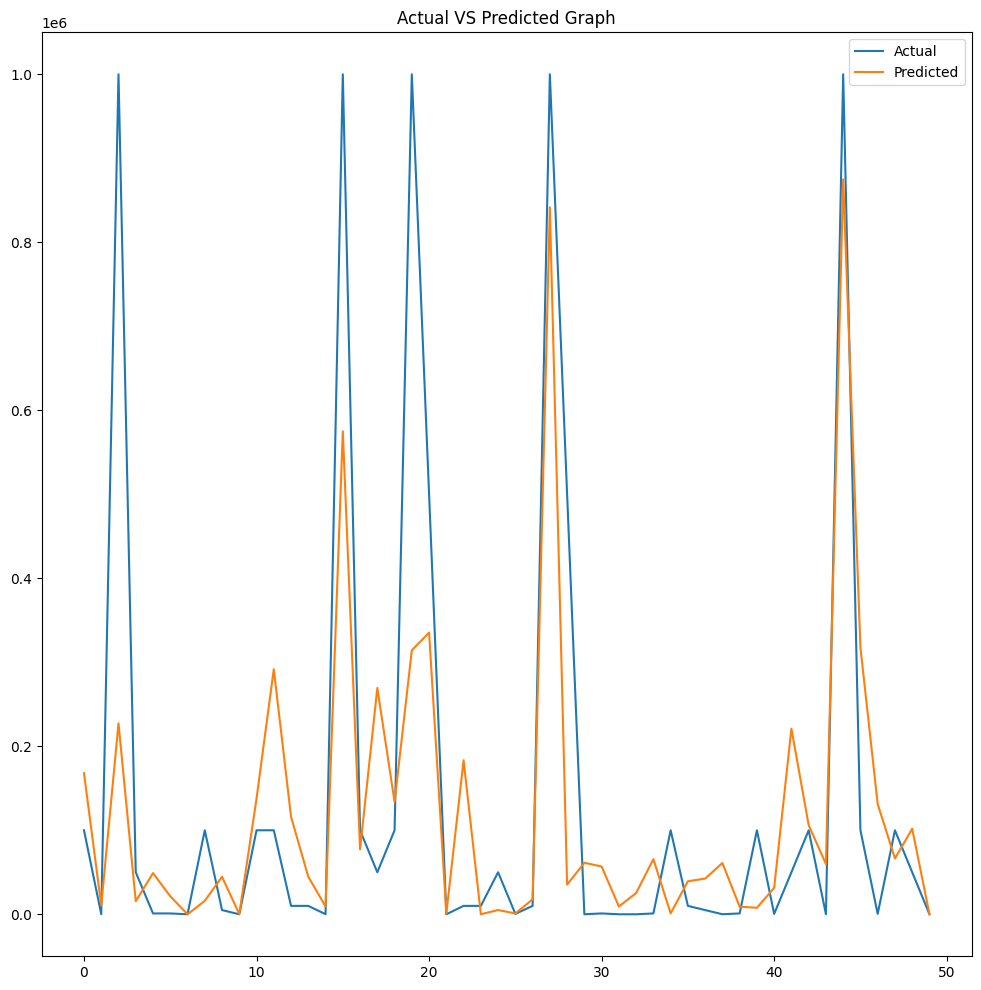

In [129]:
X = ps_data.drop(['Installs','Type','Price','Updated_Year','Content Rating','Updated_Month'], axis = 1)
y = ps_data['Installs']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=12)


# fit the model to the training set
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: {0:0.4f}',format(mse))
print('Root Mean squared error: {0:0.4f}'.format(np.sqrt(mse)))
print('R-squared score: {0:0.4f}'.format(r2))
print('Actual\t\tPredicted')
for actual, predicted in zip(y_test[:10].values, y_pred[:10]):
    print(f'{actual:.2f}\t\t{predicted:.2f}')
print('Actual\t\tPredicted')
for actual, predicted in zip(y_test[:10].values, y_pred[:10]):
    print(f'{actual:.2f}\t\t{predicted:.2f}')
plt.figure(figsize = (12,12))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Actual VS Predicted Graph')
plt.legend()
plt.show()

XG Boost Algorithm

Mean squared error: 22267227717.9403
Root Mean squared error: 149222.0752
R-squared score: 0.8456
Actual		Predicted
100000.00		652673.25
100.00		-272.30
1000000.00		621296.62
50000.00		53529.02
1000.00		3662.94
1000.00		4366.71
10.00		806.07
100000.00		135677.53
5000.00		13562.74
10.00		11940.39


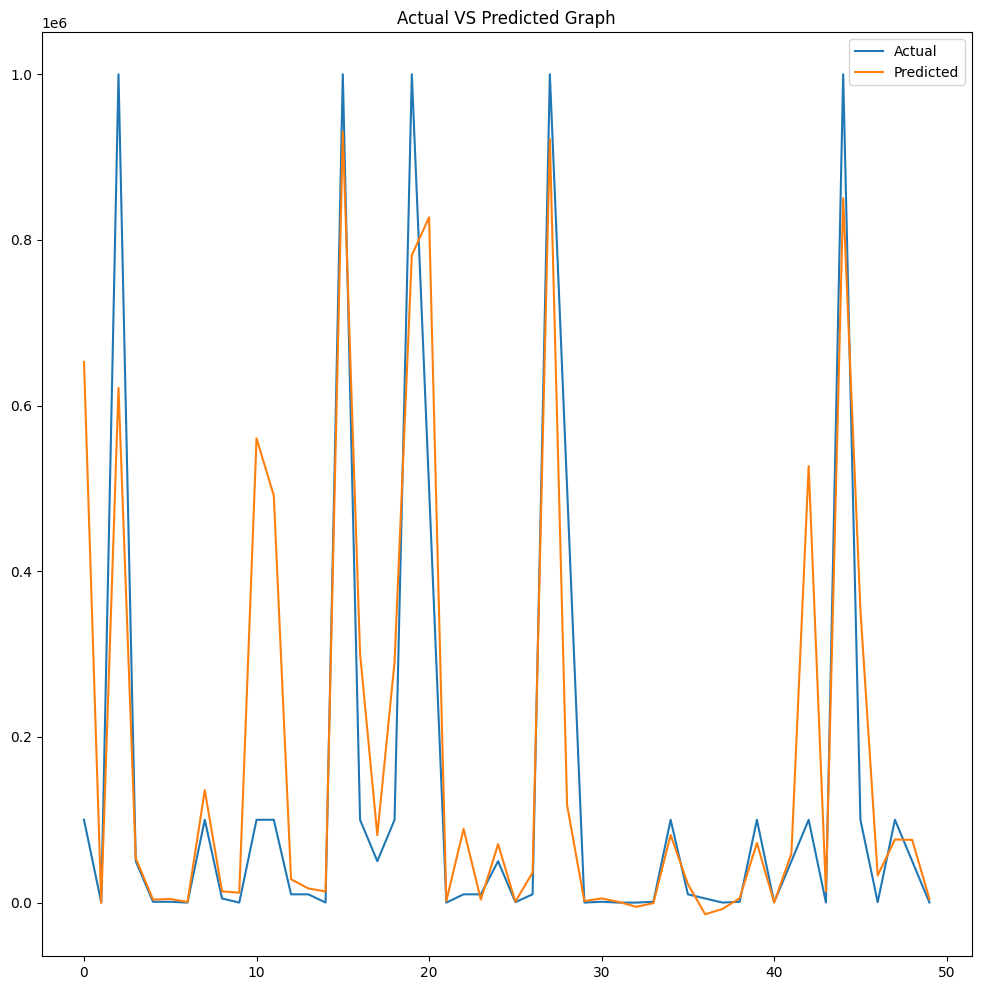

In [130]:
X = ps_data.drop(['Installs','Type','Price','Updated_Year','Content Rating','Updated_Month'], axis = 1)
y = ps_data['Installs']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create XGBoost model and train it
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgbr.fit(X_train, y_train)

# Make predictions on test set
y_pred = xgbr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {0:0.4f}'.format(mse))
print('Root Mean squared error: {0:0.4f}'.format(np.sqrt(mse)))
print('R-squared score: {0:0.4f}'.format(r2))

print('Actual\t\tPredicted')
for actual, predicted in zip(y_test[:10].values, y_pred[:10]):
    print(f'{actual:.2f}\t\t{predicted:.2f}')
plt.figure(figsize = (12,12))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Actual VS Predicted Graph')
plt.legend()
plt.show()

Ada Boost generator

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Actual		Predicted
100000.00		596356.50
100.00		-5207.73
1000000.00		559845.06
50000.00		74863.24
1000.00		4013.25
1000.00		4489.21
10.00		3319.29
100000.00		195052.30
5000.00		19721.01
10.00		15454.86


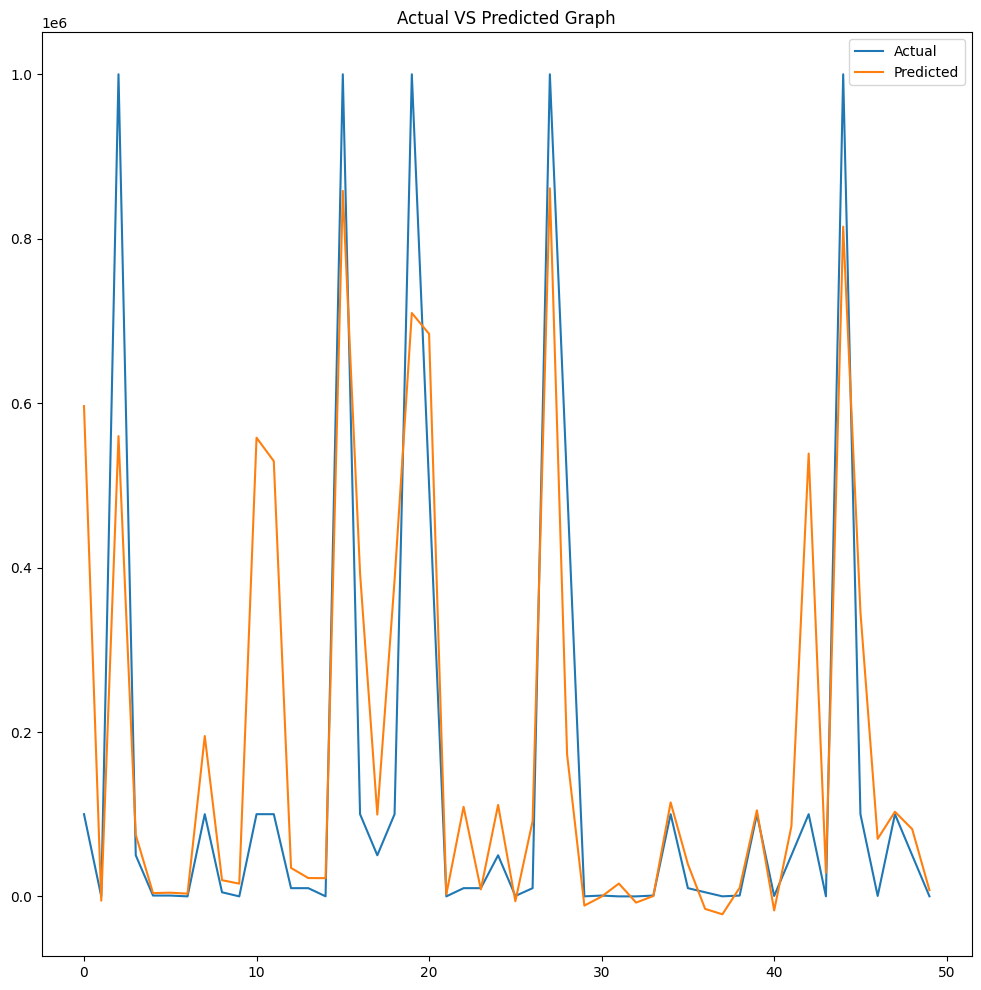

Mean squared error: 23923158604.2607
Root Mean squared error: 154671.1305
R-squared score: 0.8341


In [131]:

X = ps_data.drop(['Installs','Type','Price','Updated_Year','Content Rating','Updated_Month'], axis = 1)
y = ps_data['Installs']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create XGBoost model and train it
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# Create AdaBoost model and train it
abr = AdaBoostRegressor(base_estimator=xgbr, n_estimators=50, learning_rate=0.1, random_state=42)
abr.fit(X_train, y_train)

# Make predictions on test set
y_pred = abr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Actual\t\tPredicted')
for actual, predicted in zip(y_test[:10].values, y_pred[:10]):
    print(f'{actual:.2f}\t\t{predicted:.2f}')
plt.figure(figsize = (12,12))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Actual VS Predicted Graph')
plt.legend()
plt.show()
print('Mean squared error: {0:0.4f}'.format(mse))
print('Root Mean squared error: {0:0.4f}'.format(np.sqrt(mse)))
print('R-squared score: {0:0.4f}'.format(r2))

Linear Regression

                                 OLS Regression Results                                
Dep. Variable:               Installs   R-squared (uncentered):                   0.676
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              1915.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                        0.00
Time:                        01:58:10   Log-Likelihood:                         -76533.
No. Observations:                5514   AIC:                                  1.531e+05
Df Residuals:                    5508   BIC:                                  1.531e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

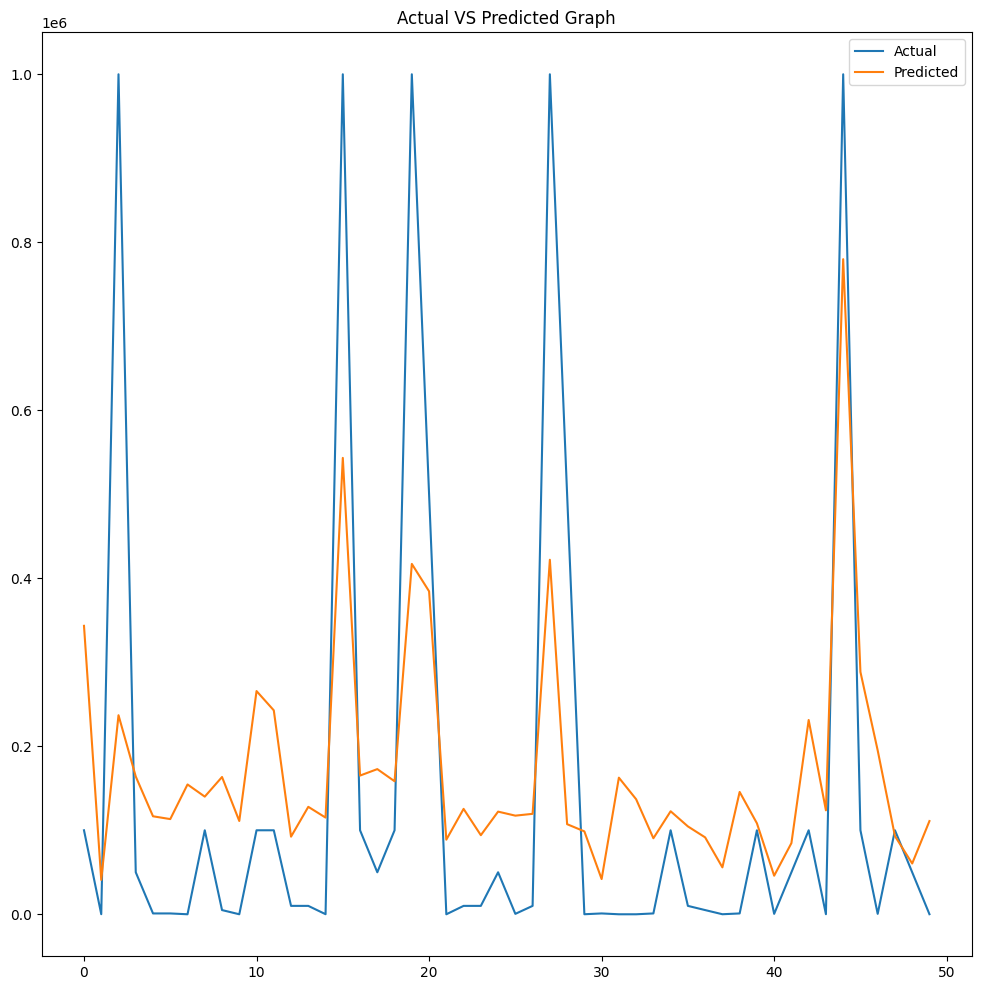

In [132]:
X = ps_data.drop(['Installs','Type','Price','Updated_Year','Content Rating','Updated_Month'], axis = 1)
y = ps_data['Installs']
model = sm.OLS(y,X).fit()
print(model.summary())
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
print('Actual\t\tPredicted')
for actual, predicted in zip(y_test[:10].values, y_pred[:10]):
    print(f'{actual:.2f}\t\t{predicted:.2f}')
plt.figure(figsize = (12,12))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Actual VS Predicted Graph')
plt.legend()
plt.show()

<b>10)	Mention the business scope of this project.</b>

*   This model will be valuable for app developers, marketing teams, and other stakeholders in the mobile app industry who want to estimate the potential success of a new app or optimize the performance of an existing app.



We Can use AdaBoost Algorithm since it giving R square as 0.845, means it is giving 84.5% of the variance of the dependent variable being studied explained by the variance of independent variable